# Resultados de cancer_sv (Illumina)

## Definición de variables e importación de módulos

In [1]:
outdir = "/home/alejandro/Escritorio/Master/TFM/Resultados"

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import re
import copy
import pickle
import os
import gzip
import sys
sys.path.append(f"{outdir}/../gitlab_tmp/workflow/notebooks/my_modules")
import helper_functions as hf

## Número total de variantes (referencia y reproducción)

In [3]:
i_variants_0 = []
with open(f"{outdir}/illumina/ListforNatureReports.IndelsandSNVs.final.Suppl1.snpEff.validated.vcf") as file:
    for line in file:
        if "#" not in line[1]:
            if "#" in line[0]:
                i_variants_0.append(line[1:].strip().split())
            else:
                variant = line.strip().split()
                variant[1] = int(variant[1])
                i_variants_0.append(variant)
                
i_variants_0_df = pd.DataFrame(i_variants_0[1:], columns = i_variants_0[0])
i_variants_0_df.CHROM = "chr" + i_variants_0_df.CHROM
i_variants_0_df.sort_values(by = [i_variants_0_df.columns[0], i_variants_0_df.columns[1]], inplace = True)
i_variants_0_df

CHROM       POS           ID REF ALT QUAL FILTER  \
0      chr1    696644            .   G   A    .   PASS   
1      chr1    822939            .   C   T    .   PASS   
2      chr1    883516            .   G   A    .   PASS   
3      chr1   1117642            .   C   T    .   PASS   
4      chr1   1224077            .   C   T    .   PASS   
...     ...       ...          ...  ..  ..  ...    ...   
35560  chrY  13261384            .   T   A    .   PASS   
35561  chrY  13263555            .   G   T    .   PASS   
35562  chrY  13275788  rs111536053   G   A    .   PASS   
35563  chrY  13301630            .   G   A    .   PASS   
35564  chrY  13318407   rs74996121   C   G    .   PASS   

                                                    INFO           FORMAT  \
0      TYPE=SNV;GROWTHS_COUNT=4;GROWTHS=Illumina;GROW...  GT:AD:DP:MIN_DP   
1      TYPE=SNV;GROWTHS_COUNT=4;GROWTHS=Illumina;GROW...  GT:AD:DP:MIN_DP   
2      TYPE=SNV;GROWTHS_COUNT=4;GROWTHS=Illumina;GROW...  GT:AD:DP:MIN_DP   
3      TYPE=SNV;GROWTHS_COUNT=4;GROWTHS=Illumina;GROW...  GT:AD:DP:MIN_DP   
4      TYPE=SNV;GROWTHS_COUNT=4;GROWTHS=Illumina;GROW...  GT:AD:DP:MIN_DP   
...                                                  ...              ...   
35560  TYPE=SNV;GROWTHS_COUNT=4;GROWTHS=Illumina;GROW...  GT:AD:DP:MIN_DP   
35561  TYPE=SNV;GROWTHS_COUNT=4;GROWTHS=Illumina;GROW...  GT:AD:DP:MIN_DP   
35562  TYPE=SNV;GROWTHS_COUNT=4;GROWTHS=Illumina;GROW...  GT:AD:DP:MIN_DP   
35563  TYPE=SNV;GROWTHS_COUNT=4;GROWTHS=Illumina;GROW...  GT:AD:DP:MIN_DP   
35564  TYPE=SNV;GROWTHS_COUNT=4;GROWTHS=Illumina;GROW...  GT:AD:DP:MIN_DP   

      COLO_829BL_llumina COLO_829BL_EPleasance COLO_829BL_TGEN  \
0            ./.:0:60:60           ./.:0:29:29     ./.:0:61:61   
1          ./.:0:115:115           ./.:0:56:56     ./.:0:94:94   
2            ./.:0:80:80           ./.:0:21:21     ./.:0:77:77   
3            ./.:0:72:72           ./.:0:30:30     ./.:0:52:52   
4              ./.:0:5:5             ./.:0:1:1       ./.:0:6:6   
...                  ...                   ...             ...   
35560        ./.:0:63:63           ./.:0:53:53     ./.:0:74:74   
35561      ./.:0:241:241           ./.:0:24:24   ./.:0:218:218   
35562        ./.:0:52:52           ./.:0:35:35     ./.:0:46:46   
35563    ./.:28,7,0:35:.             ./.:0:2:2     ./.:0:38:38   
35564        ./.:0:53:53       ./.:20,5,0:25:.     ./.:0:58:58   

         COLO_829BL_GSC   COLO_829_Illumina COLO_829_EPleasance  \
0           ./.:0:68:68    0/1:16,33,0:49:.     0/1:3,18,0:21:.   
1         ./.:0:125:125   0/1:27,80,0:107:.     0/1:4,32,0:36:.   
2           ./.:0:58:58    0/1:20,45,0:65:.     1/1:2,16,0:18:.   
3           ./.:0:59:59    0/1:16,46,0:62:.     0/1:3,10,0:13:.   
4           ./.:0:13:13     0/1:2,13,0:15:.       0/1:1,8,0:9:.   
...                 ...                 ...                 ...   
35560       ./.:0:91:91     0/1:23,6,0:29:.     0/1:27,5,0:32:.   
35561     ./.:0:215:215  0/1:207,51,0:258:.     0/1:20,6,0:26:.   
35562   ./.:53,9,0:62:.      0/1:8,3,0:11:.     0/1:32,7,0:39:.   
35563  ./.:47,19,0:66:.     1/1:1,15,0:16:.       1/1:0,7,0:7:.   
35564       ./.:0:75:75     0/1:20,7,0:27:.      0/1:8,5,0:13:.   

            COLO_829_TGEN        COLO_829_GSC  
0         1/1:0,31,0:31:.     0/1:6,40,0:46:.  
1         1/1:0,61,0:61:.   0/1:22,87,0:109:.  
2         1/1:0,67,0:67:.    0/1:11,41,0:52:.  
3         1/1:0,29,0:29:.     0/1:6,39,0:45:.  
4          0/1:2,8,0:10:.     1/1:2,11,0:13:.  
...                   ...                 ...  
35560     0/1:18,3,0:21:.     0/1:33,8,0:41:.  
35561  0/1:152,32,0:184:.  0/1:192,36,0:228:.  
35562       0/1:4,4,0:8:.     0/1:5,10,0:15:.  
35563     1/1:2,21,0:23:.     1/1:3,17,0:20:.  
35564     0/1:11,3,0:14:.      0/1:9,3,0:12:.  

[35989 rows x 17 columns]

In [4]:
i_variants_37_bwa = []
with gzip.open(f"{outdir}/illumina/sv_calling/strelka/GRCh37_bwa/results/variants/somatic.indels.vcf.gz",
               "rb") as file:
    for line in file:
        if "#" not in str(line.decode('utf-8')[1]):
            if "#" in line.decode('utf-8')[0]:
                i_variants_37_bwa.append(line.decode('utf-8')[1:].strip().split())
            else:
                i_variants_37_bwa.append(line.decode('utf-8').strip().split())
                
i_variants_37_bwa_df = pd.DataFrame(i_variants_37_bwa[1:], columns = i_variants_37_bwa[0])
i_variants_37_bwa_df

CHROM      POS ID        REF               ALT QUAL  \
0       NC_000001.10   535542  .    GCCATTT                 G    .   
1       NC_000001.10   535552  .          C  CTTTTATTGAAATAAA    .   
2       NC_000001.10   536609  .          C           CTACCCA    .   
3       NC_000001.10   537424  .         AC                 A    .   
4       NC_000001.10   547009  .        GGT                 G    .   
...              ...      ... ..        ...               ...  ...   
128973   NT_113891.2  1840912  .        TAC                 T    .   
128974   NT_167249.1   107269  .  TATATATGG                 T    .   
128975   NT_167249.1  2729832  .          C               CTA    .   
128976   NT_167251.1   112019  .        ATG                 A    .   
128977   NC_012920.1    12417  .          C                CA    .   

                  FILTER                                               INFO  \
0                 LowEVS  SOMATIC;QSI=27;TQSI=2;NT=ref;QSI_NT=27;TQSI_NT...   
1                 LowEVS  SOMATIC;QSI=15;TQSI=2;NT=ref;QSI_NT=15;TQSI_NT...   
2                 LowEVS  SOMATIC;QSI=22;TQSI=2;NT=ref;QSI_NT=22;TQSI_NT...   
3                 LowEVS  SOMATIC;QSI=6;TQSI=1;NT=ref;QSI_NT=6;TQSI_NT=1...   
4                 LowEVS  SOMATIC;QSI=13;TQSI=1;NT=ref;QSI_NT=13;TQSI_NT...   
...                  ...                                                ...   
128973            LowEVS  SOMATIC;QSI=1;TQSI=2;NT=ref;QSI_NT=1;TQSI_NT=2...   
128974            LowEVS  SOMATIC;QSI=12;TQSI=2;NT=ref;QSI_NT=12;TQSI_NT...   
128975  HighDepth;LowEVS  SOMATIC;QSI=3;TQSI=2;NT=ref;QSI_NT=3;TQSI_NT=2...   
128976            LowEVS  SOMATIC;QSI=1;TQSI=1;NT=hom;QSI_NT=1;TQSI_NT=1...   
128977              PASS  SOMATIC;QSI=3070;TQSI=1;NT=ref;QSI_NT=3070;TQS...   

                                             FORMAT  \
0       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
2       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
3       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
4       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
...                                             ...   
128973  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128974  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128975  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128976  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128977  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                                   NORMAL  \
0                56:56:51,84:5,9:2,0:54.45:1.22:0.00:0.02   
1               55:55:48,79:6,11:2,0:56.17:1.19:0.00:0.02   
2              55:55:45,136:4,12:1,1:60.09:0.47:0.00:0.00   
3                28:28:22,52:3,7:4,0:26.57:0.83:0.00:0.00   
4             23:23:19,133:1,21:3,13:22.75:0.37:0.00:0.00   
...                                                   ...   
128973        59:59:46,62:2,3:16,11:58.28:11.84:0.00:0.19   
128974           22:22:21,36:0,4:6,8:25.61:3.44:0.00:0.12   
128975         43:43:31,77:4,12:9,49:39.28:4.45:0.00:0.10   
128976           29:29:0,0:29,35:0,1:26.07:1.85:0.00:0.04   
128977  20074:20074:18104,19235:32,52:1975,1268:20022....   

                                                    TUMOR  
0                 15:15:9,30:6,9:1,0:14.69:0.74:0.00:0.00  
1                 16:16:9,30:6,9:1,1:14.85:0.77:0.00:0.00  
2                    6:6:3,34:2,8:1,1:7.11:0.19:0.00:0.00  
3                16:16:11,20:5,9:0,0:14.26:0.00:0.00:0.00  
4                11:11:7,54:3,24:1,7:11.00:0.79:0.00:0.00  
...                                                   ...  
128973        76:76:54,66:5,8:20,17:67.96:11.27:0.00:0.16  
128974          25:25:23,40:4,8:7,21:31.23:2.63:0.00:0.06  
128975        53:53:35,81:7,22:13,63:47.27:6.38:0.00:0.13  
128976           14:14:2,3:12,16:0,0:12.09:0.85:0.00:0.00  
128977  12970:12970:8547,9088:2631,2817:1789,1275:1295...  

[128978 rows x 11 columns]

## Filtración y validación de la reproducción

In [5]:
i_variants_0 = []
with open(f"{outdir}/illumina/ListforNatureReports.IndelsandSNVs.final.Suppl1.snpEff.validated.vcf") as file:
    for line in file:
        if "#" not in line[1]:
            if "#" in line[0]:
                i_variants_0.append(line[1:].strip().split())
            else:
#               if (line.strip().split()[6] == "PASS") and ("INDEL" in line.strip().split()[7]):
                if "INDEL" in line.strip().split()[7]:
                    variant = line.strip().split()
                    variant[1] = int(variant[1])
                    i_variants_0.append(variant)
                
i_variants_0_df = pd.DataFrame(i_variants_0[1:], columns = i_variants_0[0])
i_variants_0_df.CHROM = "chr" + i_variants_0_df.CHROM
i_variants_0_df.sort_values(by = [i_variants_0_df.columns[0], i_variants_0_df.columns[1]], inplace = True)
i_variants_0_df

CHROM        POS           ID       REF  ALT QUAL FILTER  \
0    chr1    1977024            .         C   CT    .   PASS   
1    chr1   27523283            .        CG    C    .   PASS   
2    chr1  106219874            .         A   AC    .   PASS   
3    chr1  119183537            .  CACAAAAA    C    .   PASS   
4    chr1  120663139            .        CG    C    .      .   
..    ...        ...          ...       ...  ...  ...    ...   
419  chrX  112581038  rs199593096         C   CT    .      .   
420  chrX  113798534            .     AAAAC    A    .   PASS   
421  chrX  132628700            .         T  TTC    .   PASS   
422  chrX  134781634            .        AC    A    .   PASS   
423  chrX  137473115            .         G   GT    .   PASS   

                                                  INFO           FORMAT  \
0    TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
1    TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
2    TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
3    TYPE=INDEL;GROWTHS_COUNT=3;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
4    TYPE=INDEL;GROWTHS_COUNT=2;GROWTHS=TGEN;GROWTH...  GT:AD:DP:MIN_DP   
..                                                 ...              ...   
419  TYPE=INDEL;GROWTHS_COUNT=1;GROWTHS=TGEN;EFF=IN...  GT:AD:DP:MIN_DP   
420  TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
421  TYPE=INDEL;GROWTHS_COUNT=3;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
422  TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
423  TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   

    COLO_829BL_llumina COLO_829BL_EPleasance COLO_829BL_TGEN   COLO_829BL_GSC  \
0          ./.:.:73:73           ./.:.:58:58     ./.:.:64:64      ./.:.:59:59   
1          ./.:.:75:75           ./.:.:29:29     ./.:.:64:64      ./.:.:48:48   
2          ./.:.:82:82           ./.:.:33:33     ./.:.:84:84    ./.:.:108:108   
3          ./.:.:75:75             ./.:.:7:7     ./.:.:73:73    ./.:.:133:133   
4          ./.:.:23:23           ./.:.:13:13     ./.:.:31:31      ./.:.:56:56   
..                 ...                   ...             ...              ...   
419     ./.:6,9,0:15:.       ./.:1,10,0:11:.     ./.:.:24:24  ./.:20,9,0:29:.   
420        ./.:.:48:48           ./.:.:22:22     ./.:.:25:25      ./.:.:45:45   
421        ./.:.:26:26           ./.:.:13:13     ./.:.:35:35      ./.:.:36:36   
422        ./.:.:58:58           ./.:.:18:18     ./.:.:36:36      ./.:.:61:61   
423        ./.:.:38:38           ./.:.:11:11     ./.:.:35:35      ./.:.:61:61   

    COLO_829_Illumina COLO_829_EPleasance     COLO_829_TGEN      COLO_829_GSC  
0    0/1:17,45,0:62:.     0/1:8,32,0:40:.   1/1:0,39,0:39:.   0/1:7,22,0:29:.  
1    0/1:13,47,0:60:.     0/1:6,14,0:20:.   1/1:0,43,0:43:.  0/1:12,24,0:36:.  
2    0/1:36,34,0:70:.    0/1:19,10,0:29:.  0/1:35,34,0:69:.  0/1:31,28,0:59:.  
3     1/1:0,47,0:47:.      ./.:1,9,0:10:.   1/1:1,44,0:45:.   1/1:0,71,0:71:.  
4       ./.:5,2,0:7:.      ./.:5,6,0:11:.    0/1:7,5,0:12:.  0/1:15,11,0:26:.  
..                ...                 ...               ...               ...  
419   ./.:0,53,0:53:.     ./.:0,22,0:22:.   1/1:0,43,0:43:.   ./.:0,50,0:50:.  
420   1/1:0,75,0:75:.     1/1:0,18,0:18:.   1/1:0,55,0:55:.   1/1:0,48,0:48:.  
421   1/1:0,42,0:42:.     ./.:1,13,0:14:.   1/1:0,39,0:39:.   1/1:3,44,0:47:.  
422   1/1:0,65,0:65:.     1/1:0,22,0:22:.   1/1:0,55,0:55:.   1/1:0,57,0:57:.  
423   1/1:0,48,0:48:.     1/1:0,29,0:29:.   1/1:0,72,0:72:.   1/1:0,88,0:88:.  

[424 rows x 17 columns]

In [6]:
i_variants_37_bwa_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                             i_variants_37_bwa_df,
                                             unlocalized = True,
                                             remove = True)
i_variants_37_bwa_df_mod

CHROM       POS ID          REF    ALT QUAL            FILTER  \
128862  chr1      4357  .            G  GAGAA    .            LowEVS   
128852  chr1      5952  .            T     TG    .            LowEVS   
128675  chr1      6765  .            T     TG    .  HighDepth;LowEVS   
128853  chr1      8016  .        GATTT      G    .            LowEVS   
128854  chr1      8282  .  CTCTTTCTCTT      C    .            LowEVS   
...      ...       ... ..          ...    ...  ...               ...   
128605  chrY  59002610  .            A     AG    .            LowEVS   
128606  chrY  59009151  .            G     GA    .            LowEVS   
128607  chrY  59024400  .            G    GCA    .  HighDepth;LowEVS   
128608  chrY  59027141  .           TA      T    .            LowEVS   
128609  chrY  59030585  .            T    TAA    .  HighDepth;LowEVS   

                                                     INFO  \
128862  SOMATIC;QSI=203;TQSI=1;NT=het;QSI_NT=3070;TQSI...   
128852  SOMATIC;QSI=93;TQSI=1;NT=het;QSI_NT=93;TQSI_NT...   
128675  SOMATIC;QSI=201;TQSI=1;NT=conflict;QSI_NT=0;TQ...   
128853  SOMATIC;QSI=46;TQSI=1;NT=het;QSI_NT=46;TQSI_NT...   
128854  SOMATIC;QSI=297;TQSI=1;NT=het;QSI_NT=3070;TQSI...   
...                                                   ...   
128605  SOMATIC;QSI=26;TQSI=1;NT=het;QSI_NT=26;TQSI_NT...   
128606  SOMATIC;QSI=7;TQSI=1;NT=het;QSI_NT=7;TQSI_NT=1...   
128607  SOMATIC;QSI=11;TQSI=2;NT=het;QSI_NT=11;TQSI_NT...   
128608  SOMATIC;QSI=76;TQSI=1;NT=het;QSI_NT=76;TQSI_NT...   
128609  SOMATIC;QSI=10;TQSI=2;NT=ref;QSI_NT=10;TQSI_NT...   

                                             FORMAT  \
128862  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128852  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128675  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128853  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128854  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
...                                             ...   
128605  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128606  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128607  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128608  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128609  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                                   NORMAL  \
128862    156:156:58,62:76,77:22,23:142.83:4.14:0.00:0.03   
128852        91:91:52,57:31,36:10,1:91.31:7.83:0.00:0.08   
128675  328:328:272,428:27,177:29,49:518.37:19.25:0.00...   
128853      131:131:95,98:34,37:6,4:119.43:4.17:0.00:0.03   
128854    153:153:67,74:70,73:18,14:140.68:2.58:0.00:0.01   
...                                                   ...   
128605    112:112:66,68:44,120:5,2:207.17:15.96:0.00:0.07   
128606   107:107:44,53:26,91:40,21:165.72:31.55:0.00:0.19   
128607  229:229:78,123:111,167:111,113:284.38:30.82:0....   
128608      93:93:47,51:30,70:10,12:109.12:4.83:0.00:0.04   
128609  297:297:254,351:6,12:79,34:314.80:45.15:0.00:0.14   

                                                    TUMOR  
128862    167:167:0,0:138,143:36,39:161.01:5.38:0.00:0.03  
128852      108:108:91,101:0,1:16,8:106.82:6.39:0.00:0.06  
128675     80:80:0,1:19,208:58,117:367.97:16.64:0.00:0.04  
128853    147:147:137,146:0,0:20,13:133.56:4.92:0.00:0.03  
128854    187:187:172,182:0,0:26,21:175.29:3.89:0.00:0.02  
...                                                   ...  
128605      65:65:1,1:39,132:19,29:159.46:23.58:0.00:0.14  
128606       65:65:0,1:26,83:43,26:143.55:29.97:0.00:0.20  
128607  178:178:23,56:102,151:109,116:232.54:23.56:0.0...  
128608         60:60:0,0:49,94:11,16:69.32:2.73:0.00:0.03  
128609  266:266:194,287:14,26:100,66:279.25:53.48:0.00...  

[128919 rows x 11 columns]

In [7]:
found_variants_37_bwa_df, not_found_variants_37_bwa_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                   i_variants_37_bwa_df_mod)

The approach followed in the built workflow has driven to the identification of
404 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 95.28% of the originaly identified SVs.


In [8]:
less_found_variants_37_bwa_df, not_less_found_variants_37_bwa_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                             i_variants_37_bwa_df_mod,
                                                                                             range_num = 0.5)

The approach followed in the built workflow has driven to the identification of
406 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 95.75% of the originaly identified SVs.


In [9]:
for pos in range(len(not_found_variants_37_bwa_df)):
    var = not_found_variants_37_bwa_df.iloc[pos]
    df = less_found_variants_37_bwa_df.iloc[list((less_found_variants_37_bwa_df.CHROM == var.CHROM) &
                                                 (less_found_variants_37_bwa_df.POS == var.POS))]
    if (len(df) > 0):
        df = i_variants_37_bwa_df_mod.iloc[list((i_variants_37_bwa_df_mod.CHROM == df.iloc[0].CHROM) &
                                                (i_variants_37_bwa_df_mod.POS == df.iloc[0].POS))]
        var = [var.to_list()[0], var.to_list()[1], var.to_list()[3], var.to_list()[4]]
        df_var = [df.iloc[0].to_list()[0], df.iloc[0].to_list()[1], df.iloc[0].to_list()[3], df.iloc[0].to_list()[4]]
        print("Referencia somática: ", end = "")
        print(var)
        print("Reproducción:        ", end = "")
        print(df_var)
        display(df)
        print()

Referencia somática: ['chr11', 18736573, 'GACT', 'G']
Reproducción:        ['chr11', 18736573, 'GACTGTGGGATACATACATACA', 'G']


CHROM       POS ID                     REF ALT QUAL  FILTER  \
79471  chr11  18736573  .  GACTGTGGGATACATACATACA   G    .  LowEVS   

                                                    INFO  \
79471  SOMATIC;QSI=214;TQSI=1;NT=het;QSI_NT=143;TQSI_...   

                                            FORMAT  \
79471  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                           NORMAL  \
79471  89:89:64,70:33,35:3,0:83.19:5.77:0.00:0.06   

                                            TUMOR  
79471  95:95:0,0:85,88:10,9:75.20:11.42:0.00:0.15


Referencia somática: ['chr12', 38817159, 'TAGG', 'T']
Reproducción:        ['chr12', 38817159, 'TA', 'T']


CHROM       POS ID REF ALT QUAL FILTER  \
94539  chr12  38817159  .  TA   T    .   PASS   

                                                    INFO  \
94539  SOMATIC;QSI=159;TQSI=1;NT=ref;QSI_NT=157;TQSI_...   

                                            FORMAT  \
94539  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                              NORMAL  \
94539  154:154:151,158:0,0:3,0:144.95:5.32:0.00:0.03   

                                                TUMOR  
94539  111:111:74,78:28,28:10,7:106.39:3.00:0.00:0.03

In [10]:
evenless_found_variants_37_bwa_df, not_evenless_found_variants_37_bwa_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                                     i_variants_37_bwa_df_mod,
                                                                                                     range_num = 15)

The approach followed in the built workflow has driven to the identification of
407 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 95.99% of the originaly identified SVs.


In [11]:
for pos in range(len(not_found_variants_37_bwa_df)):
    var = not_found_variants_37_bwa_df.iloc[pos]
    df = evenless_found_variants_37_bwa_df.iloc[list((evenless_found_variants_37_bwa_df.CHROM == var.CHROM) &
                                                     (evenless_found_variants_37_bwa_df.POS == var.POS))]
    if (len(df) > 0):
        df = i_variants_37_bwa_df_mod.iloc[list((i_variants_37_bwa_df_mod.CHROM == df.iloc[0].CHROM) &
                                                (i_variants_37_bwa_df_mod.POS.between(df.iloc[0].POS - 15,
                                                                                      df.iloc[0].POS + 15)))]
        var = [var.to_list()[0], var.to_list()[1], var.to_list()[3], var.to_list()[4]]
        df_var = [df.iloc[0].to_list()[0], df.iloc[0].to_list()[1], df.iloc[0].to_list()[3], df.iloc[0].to_list()[4]]
        print("Referencia somática: ", end = "")
        print(var)
        print("Reproducción:        ", end = "")
        print(df_var)
        display(df)
        print()

Referencia somática: ['chr1', 248611497, 'TAAG', 'T']
Reproducción:        ['chr1', 248611503, 'G', 'GA']


CHROM        POS ID REF ALT QUAL  FILTER  \
22393  chr1  248611503  .   G  GA    .  LowEVS   

                                                    INFO  \
22393  SOMATIC;QSI=19;TQSI=1;NT=ref;QSI_NT=19;TQSI_NT...   

                                            FORMAT  \
22393  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                            NORMAL  \
22393  75:75:60,125:12,28:1,0:78.94:1.71:0.00:0.01   

                                            TUMOR  
22393  56:56:27,68:22,70:8,8:64.52:2.92:0.00:0.03


Referencia somática: ['chr11', 18736573, 'GACT', 'G']
Reproducción:        ['chr11', 18736573, 'GACTGTGGGATACATACATACA', 'G']


CHROM       POS ID                     REF ALT QUAL  FILTER  \
79471  chr11  18736573  .  GACTGTGGGATACATACATACA   G    .  LowEVS   

                                                    INFO  \
79471  SOMATIC;QSI=214;TQSI=1;NT=het;QSI_NT=143;TQSI_...   

                                            FORMAT  \
79471  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                           NORMAL  \
79471  89:89:64,70:33,35:3,0:83.19:5.77:0.00:0.06   

                                            TUMOR  
79471  95:95:0,0:85,88:10,9:75.20:11.42:0.00:0.15


Referencia somática: ['chr12', 38817159, 'TAGG', 'T']
Reproducción:        ['chr12', 38817159, 'TA', 'T']


CHROM       POS ID REF ALT QUAL FILTER  \
94539  chr12  38817159  .  TA   T    .   PASS   

                                                    INFO  \
94539  SOMATIC;QSI=159;TQSI=1;NT=ref;QSI_NT=157;TQSI_...   

                                            FORMAT  \
94539  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                              NORMAL  \
94539  154:154:151,158:0,0:3,0:144.95:5.32:0.00:0.03   

                                                TUMOR  
94539  111:111:74,78:28,28:10,7:106.39:3.00:0.00:0.03

La aproximación desarrollada en el *workflow* creado ha conducido a la identificación de 404 variantes de las 424 identificadas en el trabajo originario de los datos de secuenciación empleados. Sin embargo, hay dos variantes más que deberían haber sido encontradas (la secuencia indicada en el genoma de referencia no es exactamente la misma entre la variante de la referencia buscada y la identificada en la reproducción, cuando realmente son la misma). En conclusión, la aproximación desarrollada en el *workflow* creado ha conducido a la identificación de 406 variantes de las 424 identificadas en el trabajo originario de los datos de secuenciación empleados, lo que implica recuperar un 95,75%.

In [12]:
i_variants_37_bwa_f_df = i_variants_37_bwa_df.iloc[list((i_variants_37_bwa_df.FILTER == "PASS") |
                                                        (i_variants_37_bwa_df.FILTER.str.contains("HighDepth")))]
i_variants_37_bwa_f_df = i_variants_37_bwa_f_df.iloc[list(i_variants_37_bwa_f_df.FILTER.str.contains("LowDepth") == False)]
i_variants_37_bwa_f_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                               i_variants_37_bwa_f_df,
                                               unlocalized = True,
                                               remove = True)
i_variants_37_bwa_f_df_mod

CHROM       POS ID     REF  ALT QUAL            FILTER  \
1385  chr1      6765  .       T   TG    .  HighDepth;LowEVS   
1386  chr1    127378  .    CTCA    C    .              PASS   
1387  chr1    127434  .    CTCA    C    .              PASS   
1388  chr1    129147  .       A   AT    .              PASS   
1389  chr1    130075  .   CATTT    C    .              PASS   
...    ...       ... ..     ...  ...  ...               ...   
1378  chrY  28810857  .  ATAGAG    A    .  HighDepth;LowEVS   
1379  chrY  28812939  .       G   GT    .  HighDepth;LowEVS   
1380  chrY  58996106  .      AC    A    .  HighDepth;LowEVS   
1381  chrY  59024400  .       G  GCA    .  HighDepth;LowEVS   
1382  chrY  59030585  .       T  TAA    .  HighDepth;LowEVS   

                                                   INFO  \
1385  SOMATIC;QSI=201;TQSI=1;NT=conflict;QSI_NT=0;TQ...   
1386  SOMATIC;QSI=82;TQSI=1;NT=ref;QSI_NT=82;TQSI_NT...   
1387  SOMATIC;QSI=56;TQSI=2;NT=ref;QSI_NT=56;TQSI_NT...   
1388  SOMATIC;QSI=61;TQSI=1;NT=ref;QSI_NT=61;TQSI_NT...   
1389  SOMATIC;QSI=54;TQSI=1;NT=ref;QSI_NT=54;TQSI_NT...   
...                                                 ...   
1378  SOMATIC;QSI=9;TQSI=2;NT=ref;QSI_NT=9;TQSI_NT=2...   
1379  SOMATIC;QSI=27;TQSI=1;NT=ref;QSI_NT=27;TQSI_NT...   
1380  SOMATIC;QSI=12;TQSI=1;NT=het;QSI_NT=12;TQSI_NT...   
1381  SOMATIC;QSI=11;TQSI=2;NT=het;QSI_NT=11;TQSI_NT...   
1382  SOMATIC;QSI=10;TQSI=2;NT=ref;QSI_NT=10;TQSI_NT...   

                                           FORMAT  \
1385  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1386  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1387  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1388  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1389  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
...                                           ...   
1378  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1379  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1380  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1381  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1382  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                                 NORMAL  \
1385  328:328:272,428:27,177:29,49:518.37:19.25:0.00...   
1386     104:104:82,230:7,22:12,20:97.37:7.45:0.00:0.07   
1387       70:70:52,158:3,18:15,22:71.95:7.45:0.00:0.10   
1388           61:61:53,85:3,5:5,3:62.34:2.56:0.00:0.03   
1389           55:55:51,82:4,6:2,0:61.74:0.79:0.00:0.00   
...                                                 ...   
1378  329:329:206,473:17,52:139,83:325.43:79.96:0.00...   
1379  359:359:272,498:7,21:90,347:397.98:77.88:0.00:...   
1380  207:207:78,105:103,115:24,45:222.66:24.76:0.00...   
1381  229:229:78,123:111,167:111,113:284.38:30.82:0....   
1382  297:297:254,351:6,12:79,34:314.80:45.15:0.00:0.14   

                                                  TUMOR  
1385     80:80:0,1:19,208:58,117:367.97:16.64:0.00:0.04  
1386      59:59:28,114:21,57:10,15:57.16:4.38:0.00:0.07  
1387       40:40:16,76:11,33:12,15:41.98:6.96:0.00:0.15  
1388          23:23:12,22:9,17:2,5:21.39:1.28:0.00:0.05  
1389          26:26:15,31:9,14:4,4:33.43:0.64:0.00:0.00  
...                                                 ...  
1378               3:3:0,0:0,0:4,37:2.66:2.66:0.00:1.00  
1379              4:4:0,2:0,0:6,301:5.71:4.43:0.00:0.80  
1380  188:188:39,52:116,132:31,42:200.82:28.60:0.00:...  
1381  178:178:23,56:102,151:109,116:232.54:23.56:0.0...  
1382  266:266:194,287:14,26:100,66:279.25:53.48:0.00...  

[1411 rows x 11 columns]

In [13]:
found_variants_37_bwa_f_df, not_found_variants_37_bwa_f_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                       i_variants_37_bwa_f_df_mod)

The approach followed in the built workflow has driven to the identification of
387 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 91.27% of the originaly identified SVs.


In [14]:
less_found_variants_37_bwa_f_df, not_less_found_variants_37_bwa_f_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                                 i_variants_37_bwa_f_df_mod,
                                                                                                 range_num = 0.5)

The approach followed in the built workflow has driven to the identification of
388 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 91.51% of the originaly identified SVs.


In [15]:
for pos in range(len(not_found_variants_37_bwa_f_df)):
    var = not_found_variants_37_bwa_f_df.iloc[pos]
    df = less_found_variants_37_bwa_f_df.iloc[list((less_found_variants_37_bwa_f_df.CHROM == var.CHROM) &
                                                   (less_found_variants_37_bwa_f_df.POS == var.POS))]
    if (len(df) > 0):
        df = i_variants_37_bwa_df_mod.iloc[list((i_variants_37_bwa_df_mod.CHROM == df.iloc[0].CHROM) &
                                                (i_variants_37_bwa_df_mod.POS == df.iloc[0].POS))]
        var = [var.to_list()[0], var.to_list()[1], var.to_list()[3], var.to_list()[4]]
        df_var = [df.iloc[0].to_list()[0], df.iloc[0].to_list()[1], df.iloc[0].to_list()[3], df.iloc[0].to_list()[4]]
        print("Referencia somática: ", end = "")
        print(var)
        print("Reproducción:        ", end = "")
        print(df_var)
        print()

Referencia somática: ['chr12', 38817159, 'TAGG', 'T']
Reproducción:        ['chr12', 38817159, 'TA', 'T']



La inclusión de un paso de filtracion adicional a la aproximación desarrollada en el *workflow* creado ha conducido a la identificación de 387 variantes de las 424 identificadas en el trabajo originario de los datos de secuenciación empleados. Sin embargo, hay otra variante más que debería haber sido encontrada (la secuencia indicada en el genoma de referencia no es exactamente la misma entre la variante de la referencia buscada y la identificada en la reproducción, cuando realmente son la misma). En conclusión, la aproximación desarrollada en el *workflow* creado ha conducido a la identificación de 388 variantes de las 424 identificadas en el trabajo originario de los datos de secuenciación empleados, lo que implica recuperar un 91,51%.

## Distribución de variantes en función de su longitud

In [16]:
i_variants_37_bwa_f_df = i_variants_37_bwa_df.iloc[list((i_variants_37_bwa_df.FILTER == "PASS") |
                                                        (i_variants_37_bwa_df.FILTER.str.contains("HighDepth")))]
i_variants_37_bwa_f_df = i_variants_37_bwa_f_df.iloc[list(i_variants_37_bwa_f_df.FILTER.str.contains("LowDepth") == False)]
i_variants_37_bwa_f_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                               i_variants_37_bwa_f_df)
i_variants_37_bwa_f_df_mod

CHROM       POS ID     REF  ALT QUAL            FILTER  \
1385  chr1      6765  .       T   TG    .  HighDepth;LowEVS   
1386  chr1    127378  .    CTCA    C    .              PASS   
1387  chr1    127434  .    CTCA    C    .              PASS   
1388  chr1    129147  .       A   AT    .              PASS   
1389  chr1    130075  .   CATTT    C    .              PASS   
...    ...       ... ..     ...  ...  ...               ...   
1378  chrY  28810857  .  ATAGAG    A    .  HighDepth;LowEVS   
1379  chrY  28812939  .       G   GT    .  HighDepth;LowEVS   
1380  chrY  58996106  .      AC    A    .  HighDepth;LowEVS   
1381  chrY  59024400  .       G  GCA    .  HighDepth;LowEVS   
1382  chrY  59030585  .       T  TAA    .  HighDepth;LowEVS   

                                                   INFO  \
1385  SOMATIC;QSI=201;TQSI=1;NT=conflict;QSI_NT=0;TQ...   
1386  SOMATIC;QSI=82;TQSI=1;NT=ref;QSI_NT=82;TQSI_NT...   
1387  SOMATIC;QSI=56;TQSI=2;NT=ref;QSI_NT=56;TQSI_NT...   
1388  SOMATIC;QSI=61;TQSI=1;NT=ref;QSI_NT=61;TQSI_NT...   
1389  SOMATIC;QSI=54;TQSI=1;NT=ref;QSI_NT=54;TQSI_NT...   
...                                                 ...   
1378  SOMATIC;QSI=9;TQSI=2;NT=ref;QSI_NT=9;TQSI_NT=2...   
1379  SOMATIC;QSI=27;TQSI=1;NT=ref;QSI_NT=27;TQSI_NT...   
1380  SOMATIC;QSI=12;TQSI=1;NT=het;QSI_NT=12;TQSI_NT...   
1381  SOMATIC;QSI=11;TQSI=2;NT=het;QSI_NT=11;TQSI_NT...   
1382  SOMATIC;QSI=10;TQSI=2;NT=ref;QSI_NT=10;TQSI_NT...   

                                           FORMAT  \
1385  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1386  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1387  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1388  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1389  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
...                                           ...   
1378  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1379  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1380  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1381  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1382  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                                 NORMAL  \
1385  328:328:272,428:27,177:29,49:518.37:19.25:0.00...   
1386     104:104:82,230:7,22:12,20:97.37:7.45:0.00:0.07   
1387       70:70:52,158:3,18:15,22:71.95:7.45:0.00:0.10   
1388           61:61:53,85:3,5:5,3:62.34:2.56:0.00:0.03   
1389           55:55:51,82:4,6:2,0:61.74:0.79:0.00:0.00   
...                                                 ...   
1378  329:329:206,473:17,52:139,83:325.43:79.96:0.00...   
1379  359:359:272,498:7,21:90,347:397.98:77.88:0.00:...   
1380  207:207:78,105:103,115:24,45:222.66:24.76:0.00...   
1381  229:229:78,123:111,167:111,113:284.38:30.82:0....   
1382  297:297:254,351:6,12:79,34:314.80:45.15:0.00:0.14   

                                                  TUMOR  
1385     80:80:0,1:19,208:58,117:367.97:16.64:0.00:0.04  
1386      59:59:28,114:21,57:10,15:57.16:4.38:0.00:0.07  
1387       40:40:16,76:11,33:12,15:41.98:6.96:0.00:0.15  
1388          23:23:12,22:9,17:2,5:21.39:1.28:0.00:0.05  
1389          26:26:15,31:9,14:4,4:33.43:0.64:0.00:0.00  
...                                                 ...  
1378               3:3:0,0:0,0:4,37:2.66:2.66:0.00:1.00  
1379              4:4:0,2:0,0:6,301:5.71:4.43:0.00:0.80  
1380  188:188:39,52:116,132:31,42:200.82:28.60:0.00:...  
1381  178:178:23,56:102,151:109,116:232.54:23.56:0.0...  
1382  266:266:194,287:14,26:100,66:279.25:53.48:0.00...  

[1414 rows x 11 columns]

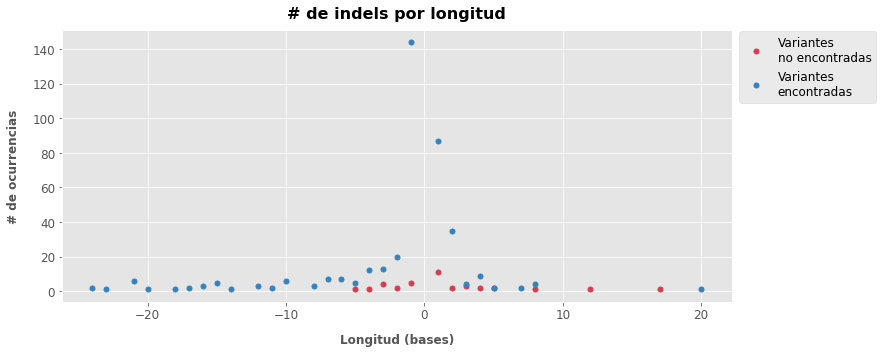

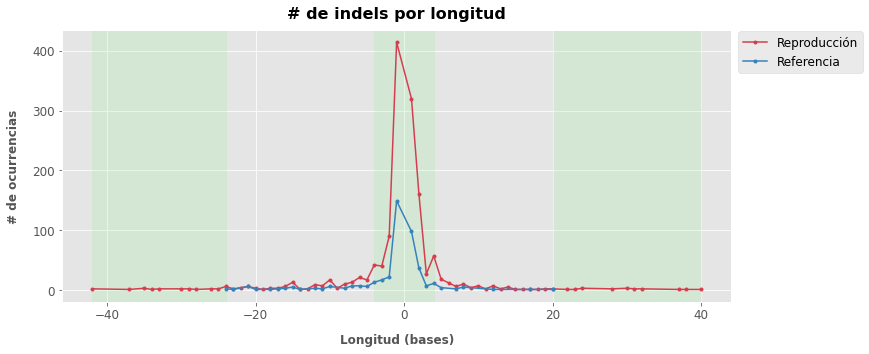

In [17]:
found_lengths = []
for pos in range(len(less_found_variants_37_bwa_f_df)):
    var = less_found_variants_37_bwa_f_df.iloc[pos].to_list()
    found_lengths.append(len(var[4]) - len(var[3]))
found_lengths = dict(sorted(pd.DataFrame(found_lengths).iloc[:, 0].value_counts().to_dict().items(),
                            key=lambda item: item[0]))

not_found_lengths = []
for pos in range(len(not_less_found_variants_37_bwa_f_df)):
    var = not_less_found_variants_37_bwa_f_df.iloc[pos].to_list()
    not_found_lengths.append(len(var[4]) - len(var[3]))
not_found_lengths = dict(sorted(pd.DataFrame(not_found_lengths).iloc[:, 0].value_counts().to_dict().items(),
                                key=lambda item: item[0]))

total_ref_lengths = []
for pos in range(len(i_variants_0_df)):
    var = i_variants_0_df.iloc[pos].to_list()
    total_ref_lengths.append(len(var[4]) - len(var[3]))
total_ref_lengths = dict(sorted(pd.DataFrame(total_ref_lengths).iloc[:, 0].value_counts().to_dict().items(),
                                key=lambda item: item[0]))
    
total_target_lengths = []
for pos in range(len(i_variants_37_bwa_f_df_mod)):
    var = i_variants_37_bwa_f_df_mod.iloc[pos].to_list()
    total_target_lengths.append(len(var[4]) - len(var[3]))
total_target_lengths = dict(sorted(pd.DataFrame(total_target_lengths).iloc[:, 0].value_counts().to_dict().items(),
                                key=lambda item: item[0]))

plt.figure(figsize = (12, 5))
objs = [not_found_lengths, found_lengths]
cols = plt.get_cmap('Spectral')(np.linspace(0.1, 0.91, 2))
labels = ["Variantes\nno encontradas", "Variantes\nencontradas"]
for pos in range(len(objs)):
    plt.plot(list(objs[pos].keys()), list(objs[pos].values()), "o", markersize = 5, color = cols[pos],
             label = labels[pos])
plt.xlabel("Longitud (bases)", fontweight = "bold", fontsize = 12, labelpad = 12)
plt.xticks(fontsize = 12)
plt.ylabel("# de ocurrencias", fontweight = "bold", fontsize = 12, labelpad = 12)
plt.yticks(fontsize = 12)
plt.title("# de indels por longitud", fontweight = "bold", y = 1.02, fontsize = 16)
plt.legend(bbox_to_anchor = (1.225, 1.018), fontsize = 12)
plt.show();

plt.figure(figsize = (12, 5))
objs = [total_target_lengths, total_ref_lengths]
cols = plt.get_cmap('Spectral')(np.linspace(0.1, 0.91, 2))
labels = ["Reproducción", "Referencia"]
for pos in range(len(objs)):
    plt.plot(list(objs[pos].keys()), list(objs[pos].values()), "o-", markersize = 3, color = cols[pos],
             label = labels[pos])
plt.xlabel("Longitud (bases)", fontweight = "bold", fontsize = 12, labelpad = 12)
plt.xticks(fontsize = 12)
plt.ylabel("# de ocurrencias", fontweight = "bold", fontsize = 12, labelpad = 12)
plt.yticks(fontsize = 12)
plt.axvspan(-4,
            4,
            alpha = 0.2,
            color = "lightgreen")
plt.axvspan(min(list(total_ref_lengths.keys())),
            min(list(total_target_lengths.keys())),
            alpha = 0.2,
            color = "lightgreen")
plt.axvspan(max(list(total_ref_lengths.keys())),
            max(list(total_target_lengths.keys())),
            alpha = 0.2,
            color = "lightgreen")
plt.title("# de indels por longitud", fontweight = "bold", y = 1.02, fontsize = 16)
plt.legend(bbox_to_anchor = (1.205, 1.018), fontsize = 12)
plt.show();

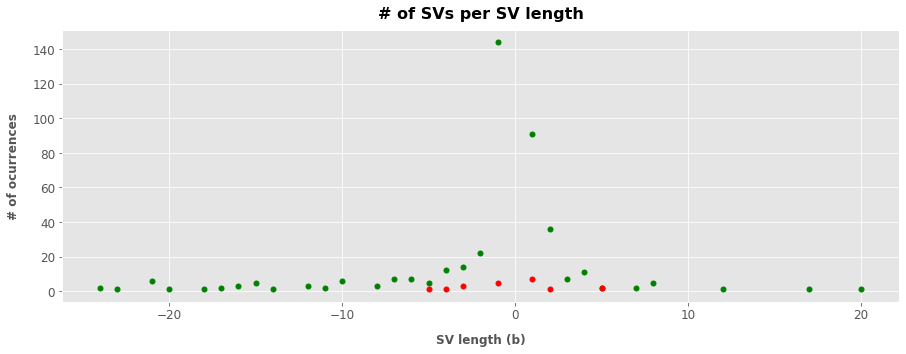

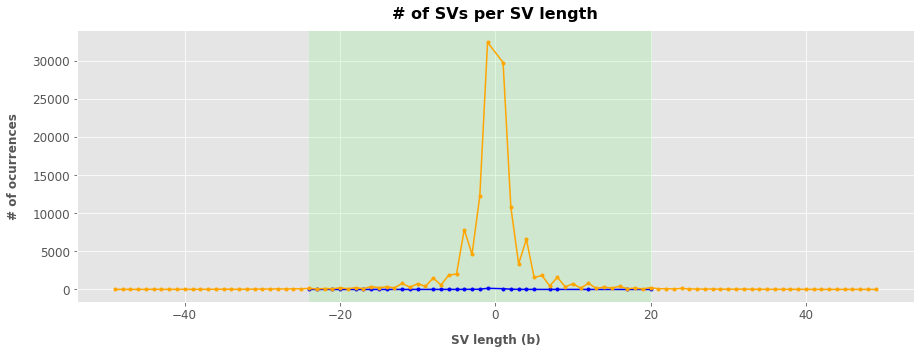

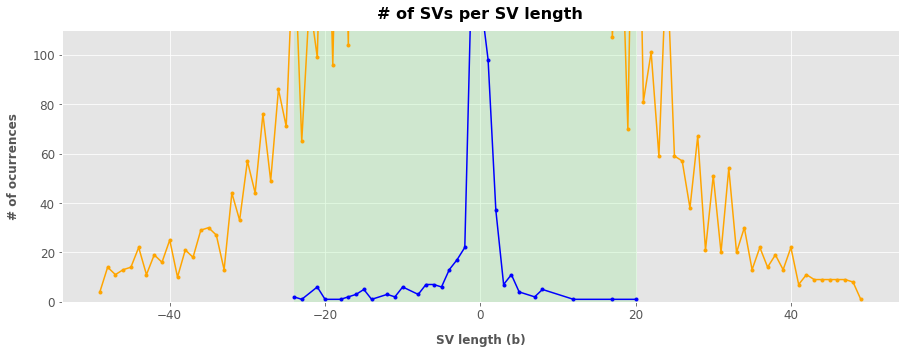

In [18]:
found_lengths = []
for pos in range(len(found_variants_37_bwa_df)):
    var = found_variants_37_bwa_df.iloc[pos].to_list()
    found_lengths.append(len(var[4]) - len(var[3]))
found_lengths = dict(sorted(pd.DataFrame(found_lengths).iloc[:, 0].value_counts().to_dict().items(),
                            key=lambda item: item[0]))

not_found_lengths = []
for pos in range(len(not_found_variants_37_bwa_df)):
    var = not_found_variants_37_bwa_df.iloc[pos].to_list()
    not_found_lengths.append(len(var[4]) - len(var[3]))
not_found_lengths = dict(sorted(pd.DataFrame(not_found_lengths).iloc[:, 0].value_counts().to_dict().items(),
                                key=lambda item: item[0]))

total_ref_lengths = []
for pos in range(len(i_variants_0_df)):
    var = i_variants_0_df.iloc[pos].to_list()
    total_ref_lengths.append(len(var[4]) - len(var[3]))
total_ref_lengths = dict(sorted(pd.DataFrame(total_ref_lengths).iloc[:, 0].value_counts().to_dict().items(),
                                key=lambda item: item[0]))
    
total_target_lengths = []
for pos in range(len(i_variants_37_bwa_df_mod)):
    var = i_variants_37_bwa_df_mod.iloc[pos].to_list()
    total_target_lengths.append(len(var[4]) - len(var[3]))
total_target_lengths = dict(sorted(pd.DataFrame(total_target_lengths).iloc[:, 0].value_counts().to_dict().items(),
                                key=lambda item: item[0]))

plt.figure(figsize = (15, 5))
objs = [found_lengths, not_found_lengths]
cols = ["green", "red"]
for pos in range(len(objs)):
    plt.plot(list(objs[pos].keys()), list(objs[pos].values()), "o", markersize = 5, color = cols[pos])
plt.xlabel("SV length (b)", fontweight = "bold", fontsize = 12, labelpad = 12)
plt.xticks(fontsize = 12)
plt.ylabel("# of ocurrences", fontweight = "bold", fontsize = 12, labelpad = 12)
plt.yticks(fontsize = 12)
plt.title("# of SVs per SV length", fontweight = "bold", y = 1.02, fontsize = 16)
plt.show();

plt.figure(figsize = (15, 5))
objs = [total_ref_lengths, total_target_lengths]
cols = ["blue", "orange"]
for pos in range(len(objs)):
    plt.plot(list(objs[pos].keys()), list(objs[pos].values()), "o-", markersize = 3, color = cols[pos])
plt.xlabel("SV length (b)", fontweight = "bold", fontsize = 12, labelpad = 12)
plt.xticks(fontsize = 12)
plt.ylabel("# of ocurrences", fontweight = "bold", fontsize = 12, labelpad = 12)
plt.yticks(fontsize = 12)
# plt.axvline(min(list(total_ref_lengths.keys())), linestyle = "--", color = "red")
# plt.axvline(max(list(total_ref_lengths.keys())), linestyle = "--", color = "red")
plt.axvspan(min(list(total_ref_lengths.keys())),
            max(list(total_ref_lengths.keys())),
            alpha = 0.25,
            color = "lightgreen")
plt.title("# of SVs per SV length", fontweight = "bold", y = 1.02, fontsize = 16)
plt.show();

plt.figure(figsize = (15, 5))
objs = [total_ref_lengths, total_target_lengths]
cols = ["blue", "orange"]
for pos in range(len(objs)):
    plt.plot(list(objs[pos].keys()), list(objs[pos].values()), "o-", markersize = 3, color = cols[pos])
plt.xlabel("SV length (b)", fontweight = "bold", fontsize = 12, labelpad = 12)
plt.xticks(fontsize = 12)
plt.ylabel("# of ocurrences", fontweight = "bold", fontsize = 12, labelpad = 12)
plt.yticks(fontsize = 12)
# plt.axvline(min(list(total_ref_lengths.keys())), linestyle = "--", color = "red")
# plt.axvline(max(list(total_ref_lengths.keys())), linestyle = "--", color = "red")
plt.axvspan(min(list(total_ref_lengths.keys())),
            max(list(total_ref_lengths.keys())),
            alpha = 0.25,
            color = "lightgreen")
plt.ylim(0, 110)
plt.title("# of SVs per SV length", fontweight = "bold", y = 1.02, fontsize = 16)
plt.show();

## Reproducción (usando Minimap2)

In [19]:
i_variants_37_m2 = []
with gzip.open(f"{outdir}/illumina/sv_calling/strelka/GRCh37_minimap2/results/variants/somatic.indels.vcf.gz",
               "rb") as file:
    for line in file:
        if "#" not in str(line.decode('utf-8')[1]):
            if "#" in line.decode('utf-8')[0]:
                i_variants_37_m2.append(line.decode('utf-8')[1:].strip().split())
            else:
                i_variants_37_m2.append(line.decode('utf-8').strip().split())
                
i_variants_37_m2_df = pd.DataFrame(i_variants_37_m2[1:], columns = i_variants_37_m2[0])
i_variants_37_m2_df

CHROM      POS ID                                   REF ALT  \
0         NC_000001.10   756285  .  ATCCACCCTGTCTACACTACCTGCTTGTCCAGCAGG   A   
1         NC_000001.10   763769  .                                    AT   A   
2         NC_000001.10   787069  .                                   CAG   C   
3         NC_000001.10   814743  .                                    AC   A   
4         NC_000001.10   832960  .                                    AT   A   
...                ...      ... ..                                   ...  ..   
128401  NW_003315967.1    23129  .                                     G  GT   
128402  NW_004070888.1   681168  .                                    TA   T   
128403     NT_113891.2  1164378  .                                   TAC   T   
128404     NT_113891.2  2843829  .                                  GAGA   G   
128405     NC_012920.1    12417  .                                     C  CA   

       QUAL  FILTER                                               INFO  \
0         .  LowEVS  SOMATIC;QSI=21;TQSI=2;NT=het;QSI_NT=21;TQSI_NT...   
1         .  LowEVS  SOMATIC;QSI=1;TQSI=1;NT=het;QSI_NT=1;TQSI_NT=1...   
2         .  LowEVS  SOMATIC;QSI=30;TQSI=2;NT=ref;QSI_NT=30;TQSI_NT...   
3         .  LowEVS  SOMATIC;QSI=1;TQSI=2;NT=ref;QSI_NT=1;TQSI_NT=2...   
4         .  LowEVS  SOMATIC;QSI=2;TQSI=1;NT=het;QSI_NT=2;TQSI_NT=1...   
...     ...     ...                                                ...   
128401    .  LowEVS  SOMATIC;QSI=1;TQSI=1;NT=het;QSI_NT=1;TQSI_NT=1...   
128402    .  LowEVS  SOMATIC;QSI=6;TQSI=1;NT=ref;QSI_NT=6;TQSI_NT=1...   
128403    .  LowEVS  SOMATIC;QSI=16;TQSI=1;NT=ref;QSI_NT=16;TQSI_NT...   
128404    .  LowEVS  SOMATIC;QSI=4;TQSI=2;NT=ref;QSI_NT=4;TQSI_NT=2...   
128405    .    PASS  SOMATIC;QSI=3070;TQSI=1;NT=ref;QSI_NT=3070;TQS...   

                                             FORMAT  \
0       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
2       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
3       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
4       DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
...                                             ...   
128401  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128402  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128403  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128404  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128405  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                                   NORMAL  \
0        134:134:42,74:42,52:65,31:105.62:15.20:0.00:0.14   
1         102:102:42,47:43,45:17,17:100.09:4.58:0.00:0.04   
2                60:60:55,74:6,8:0,1:59.57:0.47:0.00:0.00   
3        194:194:179,212:2,3:13,10:194.17:15.07:0.00:0.08   
4         147:147:72,76:65,66:10,10:142.85:1.60:0.00:0.01   
...                                                   ...   
128401   102:102:53,66:16,25:34,19:101.93:19.01:0.00:0.19   
128402               8:8:6,23:1,2:1,4:6.91:1.43:0.00:0.17   
128403         54:54:44,52:1,1:13,30:51.88:4.31:0.00:0.08   
128404          53:53:51,63:1,12:2,2:52.20:0.56:0.00:0.00   
128405  19832:19832:18024,18996:32,51:1809,1239:19785....   

                                                    TUMOR  
0             97:97:6,19:60,66:37,27:62.07:4.92:0.00:0.06  
1             89:89:17,20:61,66:11,9:86.71:2.80:0.00:0.02  
2            59:59:36,52:15,17:10,12:55.02:0.83:0.00:0.00  
3       139:139:115,143:7,11:19,26:148.08:12.58:0.00:0.08  
4           108:108:23,23:77,82:8,8:107.72:2.36:0.00:0.02  
...                                                   ...  
128401      101:101:75,90:1,3:25,13:96.64:14.95:0.00:0.15  
128402             11:11:0,2:8,31:3,6:8.93:2.12:0.00:0.25  
128403         76:76:56,68:4,4:21,35:77.30:5.06:0.00:0.06  
128404          47:47:39,53:4,19:4,4:49.89:0.02:0.00:0.00  
128405  12782:12782:8493,8966:2620,2784:1665,1244:1277...  

[128406 rows x 11 columns]

In [20]:
i_variants_37_m2_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                            i_variants_37_m2_df,
                                            unlocalized = True,
                                            remove = True)
i_variants_37_m2_df_mod

CHROM       POS ID          REF    ALT QUAL            FILTER  \
128317  chr1      4357  .            G  GAGAA    .            LowEVS   
128308  chr1      5952  .            T     TG    .            LowEVS   
128309  chr1      8282  .  CTCTTTCTCTT      C    .            LowEVS   
128310  chr1      8327  .            T  TCTTC    .            LowEVS   
128311  chr1     10752  .           AT      A    .            LowEVS   
...      ...       ... ..          ...    ...  ...               ...   
128146  chrY  59002610  .            A     AG    .            LowEVS   
128147  chrY  59009151  .            G     GA    .            LowEVS   
128148  chrY  59024400  .            G    GCA    .  HighDepth;LowEVS   
128149  chrY  59027141  .           TA      T    .            LowEVS   
128150  chrY  59033423  .            T     TC    .            LowEVS   

                                                     INFO  \
128317  SOMATIC;QSI=202;TQSI=1;NT=het;QSI_NT=3070;TQSI...   
128308  SOMATIC;QSI=94;TQSI=1;NT=het;QSI_NT=94;TQSI_NT...   
128309  SOMATIC;QSI=292;TQSI=1;NT=het;QSI_NT=3070;TQSI...   
128310  SOMATIC;QSI=269;TQSI=1;NT=het;QSI_NT=3070;TQSI...   
128311  SOMATIC;QSI=5;TQSI=1;NT=het;QSI_NT=5;TQSI_NT=1...   
...                                                   ...   
128146  SOMATIC;QSI=26;TQSI=1;NT=het;QSI_NT=26;TQSI_NT...   
128147  SOMATIC;QSI=59;TQSI=1;NT=het;QSI_NT=59;TQSI_NT...   
128148  SOMATIC;QSI=1;TQSI=2;NT=het;QSI_NT=1;TQSI_NT=2...   
128149  SOMATIC;QSI=30;TQSI=1;NT=conflict;QSI_NT=0;TQS...   
128150  SOMATIC;QSI=28;TQSI=2;NT=ref;QSI_NT=28;TQSI_NT...   

                                             FORMAT  \
128317  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128308  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128309  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128310  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128311  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
...                                             ...   
128146  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128147  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128148  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128149  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
128150  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                                   NORMAL  \
128317    156:156:58,62:76,77:22,20:142.31:3.93:0.00:0.02   
128308         88:88:51,55:31,36:8,1:88.61:6.13:0.00:0.07   
128309    152:152:67,72:69,72:17,18:139.17:2.46:0.00:0.01   
128310    133:133:52,57:66,72:16,14:123.09:4.86:0.00:0.03   
128311       52:52:13,34:8,42:32,11:50.49:13.30:0.00:0.26   
...                                                   ...   
128146    107:107:64,68:44,121:2,1:200.17:14.40:0.00:0.07   
128147   118:118:42,51:48,89:29,21:166.19:29.49:0.00:0.17   
128148  239:239:63,95:90,176:109,111:243.52:30.76:0.00...   
128149         68:68:44,50:15,83:4,9:75.43:2.04:0.00:0.03   
128150          67:67:51,58:9,18:7,7:67.75:4.29:0.00:0.06   

                                                    TUMOR  
128317    165:165:0,0:137,142:34,37:158.68:3.79:0.00:0.02  
128308      106:106:90,100:0,1:15,8:104.42:5.79:0.00:0.05  
128309    183:183:170,179:0,0:24,21:171.80:2.11:0.00:0.01  
128310    155:155:135,142:0,0:17,16:158.45:3.50:0.00:0.02  
128311        76:76:36,72:0,5:42,17:73.45:21.73:0.00:0.29  
...                                                   ...  
128146      64:64:1,1:39,129:23,30:156.84:23.09:0.00:0.15  
128147       81:81:0,1:44,84:38,29:136.59:24.74:0.00:0.18  
128148  193:193:13,34:88,180:110,113:205.72:28.76:0.00...  
128149          37:37:0,0:31,98:6,17:36.60:1.01:0.00:0.03  
128150          19:19:2,5:10,27:6,11:17.86:0.89:0.00:0.00  

[128373 rows x 11 columns]

In [21]:
found_variants_37_m2_df, not_found_variants_37_m2_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                 i_variants_37_m2_df_mod)

The approach followed in the built workflow has driven to the identification of
403 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 95.05% of the originaly identified SVs.


In [22]:
_ = hf.SVs_coincident_counter_three(i_variants_0_df, i_variants_37_bwa_df_mod, i_variants_37_m2_df_mod)

The approach followed in the built workflow has driven to the identification of
404 and 403 SVs, respectively for the first and the second given DataFrames,
out of the 424 identified in the work from which the data was obtained.
Moreover the number of same SVs found in both given DataFrames is 403.


In [23]:
less_found_variants_37_m2_df, not_less_found_variants_37_m2_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                           i_variants_37_m2_df_mod,
                                                                                           range_num = 0.5)

The approach followed in the built workflow has driven to the identification of
405 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 95.52% of the originaly identified SVs.


In [24]:
for pos in range(len(not_found_variants_37_m2_df)):
    var = not_found_variants_37_m2_df.iloc[pos]
    df = less_found_variants_37_m2_df.iloc[list((less_found_variants_37_m2_df.CHROM == var.CHROM) &
                                                 (less_found_variants_37_m2_df.POS == var.POS))]
    if (len(df) > 0):
        df = i_variants_37_m2_df_mod.iloc[list((i_variants_37_m2_df_mod.CHROM == df.iloc[0].CHROM) &
                                                (i_variants_37_m2_df_mod.POS == df.iloc[0].POS))]
        var = [var.to_list()[0], var.to_list()[1], var.to_list()[3], var.to_list()[4]]
        df_var = [df.iloc[0].to_list()[0], df.iloc[0].to_list()[1], df.iloc[0].to_list()[3], df.iloc[0].to_list()[4]]
        print("Referencia somática: ", end = "")
        print(var)
        print("Reproducción:        ", end = "")
        print(df_var)
        display(df)
        print()

Referencia somática: ['chr11', 18736573, 'GACT', 'G']
Reproducción:        ['chr11', 18736573, 'GACTGTGGGATACATACATACA', 'G']


CHROM       POS ID                     REF ALT QUAL  FILTER  \
79403  chr11  18736573  .  GACTGTGGGATACATACATACA   G    .  LowEVS   

                                                    INFO  \
79403  SOMATIC;QSI=208;TQSI=1;NT=het;QSI_NT=143;TQSI_...   

                                            FORMAT  \
79403  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                           NORMAL  \
79403  88:88:64,69:33,35:2,0:82.21:4.79:0.00:0.05   

                                          TUMOR  
79403  92:92:0,0:83,87:9,8:72.41:9.77:0.00:0.12


Referencia somática: ['chr12', 38817159, 'TAGG', 'T']
Reproducción:        ['chr12', 38817159, 'TA', 'T']


CHROM       POS ID REF ALT QUAL FILTER  \
94496  chr12  38817159  .  TA   T    .   PASS   

                                                    INFO  \
94496  SOMATIC;QSI=155;TQSI=1;NT=ref;QSI_NT=157;TQSI_...   

                                            FORMAT  \
94496  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                              NORMAL  \
94496  152:152:150,157:0,0:2,0:142.90:3.74:0.00:0.02   

                                               TUMOR  
94496  106:106:74,78:27,28:6,6:102.14:0.89:0.00:0.00

In [25]:
_ = hf.SVs_coincident_counter_three(i_variants_0_df, less_found_variants_37_bwa_df, less_found_variants_37_m2_df)

The approach followed in the built workflow has driven to the identification of
406 and 405 SVs, respectively for the first and the second given DataFrames,
out of the 424 identified in the work from which the data was obtained.
Moreover the number of same SVs found in both given DataFrames is 405.


La aproximación desarrollada en el *workflow* creado ha conducido a la identificación de 403 variantes de las 424 identificadas en el trabajo originario de los datos de secuenciación empleados. Sin embargo, hay dos variantes más que deberían haber sido encontradas (la secuencia indicada en el genoma de referencia no es exactamente la misma entre la variante de la referencia buscada y la identificada en la reproducción, cuando realmente son la misma). En conclusión, la aproximación desarrollada en el *workflow* creado ha conducido a la identificación de 405 variantes de las 424 identificadas en el trabajo originario de los datos de secuenciación empleados, lo que implica recuperar un 95,52%.

Las dos variantes que no se cuentan en cada aproximación (BWA y Minimap2) son las mismas:
- chr11, 18736573.
- chr12, 38817159.

Además, las 405 variantes identificadas por esta estrategia se encuentran entre las 406 identificadas en la anterior.

In [26]:
evenless_found_variants_37_m2_df, not_evenless_found_variants_37_m2_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                                   i_variants_37_m2_df_mod,
                                                                                                   range_num = 15)

The approach followed in the built workflow has driven to the identification of
406 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 95.75% of the originaly identified SVs.


In [27]:
for pos in range(len(not_found_variants_37_m2_df)):
    var = not_found_variants_37_m2_df.iloc[pos]
    df = evenless_found_variants_37_m2_df.iloc[list((evenless_found_variants_37_m2_df.CHROM == var.CHROM) &
                                                    (evenless_found_variants_37_m2_df.POS == var.POS))]
    if (len(df) > 0):
        df = i_variants_37_m2_df_mod.iloc[list((i_variants_37_m2_df_mod.CHROM == df.iloc[0].CHROM) &
                                               (i_variants_37_m2_df_mod.POS.between(df.iloc[0].POS - 15,
                                                                                    df.iloc[0].POS + 15)))]
        var = [var.to_list()[0], var.to_list()[1], var.to_list()[3], var.to_list()[4]]
        df_var = [df.iloc[0].to_list()[0], df.iloc[0].to_list()[1], df.iloc[0].to_list()[3], df.iloc[0].to_list()[4]]
        print("Referencia somática: ", end = "")
        print(var)
        print("Reproducción:        ", end = "")
        print(df_var)
        display(df)
        print()

Referencia somática: ['chr1', 248611497, 'TAAG', 'T']
Reproducción:        ['chr1', 248611503, 'G', 'GA']


CHROM        POS ID REF ALT QUAL  FILTER  \
22337  chr1  248611503  .   G  GA    .  LowEVS   

                                                    INFO  \
22337  SOMATIC;QSI=2;TQSI=1;NT=ref;QSI_NT=2;TQSI_NT=1...   

                                            FORMAT  \
22337  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                           NORMAL  \
22337  54:54:42,125:9,27:1,0:51.56:1.04:0.00:0.02   

                                            TUMOR  
22337  42:42:18,70:19,70:6,9:48.05:1.05:0.00:0.02


Referencia somática: ['chr11', 18736573, 'GACT', 'G']
Reproducción:        ['chr11', 18736573, 'GACTGTGGGATACATACATACA', 'G']


CHROM       POS ID                     REF ALT QUAL  FILTER  \
79403  chr11  18736573  .  GACTGTGGGATACATACATACA   G    .  LowEVS   

                                                    INFO  \
79403  SOMATIC;QSI=208;TQSI=1;NT=het;QSI_NT=143;TQSI_...   

                                            FORMAT  \
79403  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                           NORMAL  \
79403  88:88:64,69:33,35:2,0:82.21:4.79:0.00:0.05   

                                          TUMOR  
79403  92:92:0,0:83,87:9,8:72.41:9.77:0.00:0.12


Referencia somática: ['chr12', 38817159, 'TAGG', 'T']
Reproducción:        ['chr12', 38817159, 'TA', 'T']


CHROM       POS ID REF ALT QUAL FILTER  \
94496  chr12  38817159  .  TA   T    .   PASS   

                                                    INFO  \
94496  SOMATIC;QSI=155;TQSI=1;NT=ref;QSI_NT=157;TQSI_...   

                                            FORMAT  \
94496  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                              NORMAL  \
94496  152:152:150,157:0,0:2,0:142.90:3.74:0.00:0.02   

                                               TUMOR  
94496  106:106:74,78:27,28:6,6:102.14:0.89:0.00:0.00

In [29]:
i_variants_37_m2_f_df = i_variants_37_m2_df.iloc[list((i_variants_37_m2_df.FILTER == "PASS") |
                                                      (i_variants_37_m2_df.FILTER.str.contains("HighDepth")))]
i_variants_37_m2_f_df = i_variants_37_m2_f_df.iloc[list(i_variants_37_m2_f_df.FILTER.str.contains("LowDepth") == False)]
i_variants_37_m2_f_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                              i_variants_37_m2_f_df,
                                              unlocalized = True,
                                              remove = True)
i_variants_37_m2_f_df_mod

CHROM       POS ID                REF     ALT QUAL            FILTER  \
1280  chr1    127378  .               CTCA       C    .              PASS   
1281  chr1    130000  .               CTCA       C    .              PASS   
1279  chr1    558804  .                  A      AG    .              PASS   
1282  chr1   1642129  .                  A  AATGAG    .         HighDepth   
0     chr1   1977024  .                  C      CT    .              PASS   
...    ...       ... ..                ...     ...  ...               ...   
1274  chrY  13971653  .  AAGTCAGGCAGGCAGGC       A    .              PASS   
1275  chrY  28467429  .                  A      AT    .              PASS   
1276  chrY  28586339  .                  A      AT    .              PASS   
1277  chrY  28588254  .                  G      GC    .  HighDepth;LowEVS   
1278  chrY  59024400  .                  G     GCA    .  HighDepth;LowEVS   

                                                   INFO  \
1280  SOMATIC;QSI=63;TQSI=1;NT=ref;QSI_NT=63;TQSI_NT...   
1281  SOMATIC;QSI=37;TQSI=2;NT=ref;QSI_NT=37;TQSI_NT...   
1279  SOMATIC;QSI=70;TQSI=1;NT=ref;QSI_NT=70;TQSI_NT...   
1282  SOMATIC;QSI=39;TQSI=1;NT=ref;QSI_NT=39;TQSI_NT...   
0     SOMATIC;QSI=215;TQSI=1;NT=ref;QSI_NT=3070;TQSI...   
...                                                 ...   
1274  SOMATIC;QSI=41;TQSI=1;NT=ref;QSI_NT=41;TQSI_NT...   
1275  SOMATIC;QSI=60;TQSI=1;NT=ref;QSI_NT=60;TQSI_NT...   
1276  SOMATIC;QSI=74;TQSI=2;NT=ref;QSI_NT=74;TQSI_NT...   
1277  SOMATIC;QSI=63;TQSI=2;NT=conflict;QSI_NT=0;TQS...   
1278  SOMATIC;QSI=1;TQSI=2;NT=het;QSI_NT=1;TQSI_NT=2...   

                                           FORMAT  \
1280  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1281  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1279  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1282  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
0     DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
...                                           ...   
1274  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1275  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1276  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1277  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   
1278  DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50   

                                                 NORMAL  \
1280        49:49:45,202:1,25:1,21:43.25:1.72:0.00:0.02   
1281         43:43:41,110:1,11:1,6:41.39:0.00:0.00:0.00   
1279           60:60:57,63:3,9:0,1:59.00:0.00:0.00:0.00   
1282   263:263:237,293:9,37:20,38:237.59:1.52:0.00:0.00   
0         105:105:72,102:1,6:32,4:94.90:21.15:0.00:0.22   
...                                                 ...   
1274           35:35:30,39:0,6:7,9:34.18:2.50:0.00:0.06   
1275           73:73:61,65:6,6:6,6:74.08:0.61:0.00:0.00   
1276          77:77:70,73:8,16:3,2:80.98:0.90:0.00:0.00   
1277  200:200:77,79:13,208:108,0:194.62:72.39:0.00:0.37   
1278  239:239:63,95:90,176:109,111:243.52:30.76:0.00...   

                                                  TUMOR  
1280           10:10:4,93:4,52:1,10:8.35:0.13:0.00:0.00  
1281              5:5:2,49:3,17:0,8:4.53:0.00:0.00:0.00  
1279               6:6:0,0:3,21:4,8:8.88:0.00:0.00:0.00  
1282  184:184:137,164:33,93:14,37:167.98:1.00:0.00:0.01  
0            60:60:9,18:32,42:20,7:57.70:8.31:0.00:0.14  
...                                                 ...  
1274          20:20:0,4:4,20:15,17:16.39:4.97:0.00:0.25  
1275                5:5:0,0:4,5:1,1:6.34:0.67:0.00:0.00  
1276            14:14:0,0:8,21:6,4:18.55:1.99:0.00:0.06  
1277    126:126:0,0:6,189:121,25:116.24:69.54:0.00:0.59  
1278  193:193:13,34:88,180:110,113:205.72:28.76:0.00...  

[1288 rows x 11 columns]

In [30]:
found_variants_37_m2_f_df, not_found_variants_37_m2_f_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                     i_variants_37_m2_f_df_mod)

The approach followed in the built workflow has driven to the identification of
386 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 91.04% of the originaly identified SVs.


In [31]:
less_found_variants_37_m2_f_df, not_less_found_variants_37_m2_f_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                               i_variants_37_m2_f_df_mod,
                                                                                               range_num = 0.5)

The approach followed in the built workflow has driven to the identification of
387 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 91.27% of the originaly identified SVs.


In [32]:
_ = hf.SVs_coincident_counter_three(i_variants_0_df, less_found_variants_37_bwa_f_df, less_found_variants_37_m2_f_df)

The approach followed in the built workflow has driven to the identification of
388 and 387 SVs, respectively for the first and the second given DataFrames,
out of the 424 identified in the work from which the data was obtained.
Moreover the number of same SVs found in both given DataFrames is 387.


La inclusión de un paso de filtracion adicional a la aproximación desarrollada en el *workflow* creado ha conducido a la identificación de 386 variantes de las 424 identificadas en el trabajo originario de los datos de secuenciación empleados. Sin embargo, hay otra variante más que debería haber sido encontrada (la secuencia indicada en el genoma de referencia no es exactamente la misma entre la variante de la referencia buscada y la identificada en la reproducción, cuando realmente son la misma). En conclusión, la aproximación desarrollada en el *workflow* creado ha conducido a la identificación de 387 variantes de las 424 identificadas en el trabajo originario de los datos de secuenciación empleados, lo que implica recuperar un 91,04%.

## Reproducción (hasta la identificación de variantes por Manta)

In [33]:
manta_37_bwa = []
with gzip.open(f"{outdir}/illumina/sv_calling/manta/GRCh37_bwa/results/variants/candidateSV.vcf.gz",
               "rb") as file:
    for line in file:
        if "#" not in str(line.decode('utf-8')[1]):
            if "#" in line.decode('utf-8')[0]:
                manta_37_bwa.append(line.decode('utf-8')[1:].strip().split())
            else:
                manta_37_bwa.append(line.decode('utf-8').strip().split())
                
manta_37_bwa_df = pd.DataFrame(manta_37_bwa[1:], columns = manta_37_bwa[0])
# manta_37_bwa_df.drop_duplicates(subset = ["CHROM", "POS", "REF", "ALT"], inplace = True)
manta_37_bwa_df

CHROM    POS                                ID             REF  \
0       NC_000001.10  16742              MantaINS:3:0:0:0:0:0               G   
1       NC_000001.10  50481              MantaINS:0:0:0:0:0:0               G   
2       NC_000001.10  66184            MantaBND:1:0:1:1:0:0:0               C   
3       NC_000001.10  66365              MantaINS:1:0:0:1:1:0  AATATAATATATAA   
4       NC_000001.10  66365              MantaINS:1:0:0:3:1:0  AATATAATATATAA   
...              ...    ...                               ...             ...   
143139   NC_012920.1  11458  MantaBND:1:122175:122175:3:0:0:1               A   
143140   NC_012920.1  12106   MantaINS:1:122175:122175:12:2:0               C   
143141   NC_012920.1  12232  MantaBND:1:122175:122175:0:0:0:1               T   
143142   NC_012920.1  12245  MantaBND:1:122175:122175:0:0:0:0               T   
143143   NC_012920.1  12837   MantaINS:1:122175:122175:18:6:0               A   

                                                      ALT QUAL FILTER  \
0                                              GTGGTGGTGC    .      .   
1                                               GGTGTGTGT    .      .   
2                                   ]NC_000019.9:108016]C    .      .   
3       ATATATATATTATTATATAATATATATTATATAATATATTTTATTA...    .      .   
4       ATATATATATTATTATATAATATATATTATATAATATATTTTATTA...    .      .   
...                                                   ...  ...    ...   
143139                               [NC_012920.1:11452[A    .      .   
143140  CAACCCCGACATCATTACCGGGTTTTCCTCTTGTAAATATAGTTTA...    .      .   
143141                               T]NC_012920.1:12245]    .      .   
143142                               T]NC_012920.1:12232]    .      .   
143143  AGCCATTCAAGCAATCCTATACAACCGATATCGCCGATACGGTTGT...    .      .   

                                                     INFO  
0       END=16742;SVTYPE=INS;SVLEN=9;CIGAR=1M9I;CIPOS=...  
1       END=50481;SVTYPE=INS;SVLEN=8;CIGAR=1M8I;CIPOS=...  
2       SVTYPE=BND;MATEID=MantaBND:1:0:1:1:0:0:1;IMPRE...  
3       END=66378;SVTYPE=INS;SVLEN=142;CIGAR=1M142I13D...  
4       END=66378;SVTYPE=INS;SVLEN=142;CIGAR=1M142I13D...  
...                                                   ...  
143139  SVTYPE=BND;MATEID=MantaBND:1:122175:122175:3:0...  
143140  END=12106;SVTYPE=INS;SVLEN=102;CIGAR=1M102I;CI...  
143141  SVTYPE=BND;MATEID=MantaBND:1:122175:122175:0:0...  
143142  SVTYPE=BND;MATEID=MantaBND:1:122175:122175:0:0...  
143143  END=12837;SVTYPE=INS;SVLEN=80;CIGAR=1M80I;CIPO...  

[143144 rows x 8 columns]

In [34]:
manta_37_bwa_f_df = manta_37_bwa_df.iloc[list((manta_37_bwa_df.INFO.str.contains("BND") == False))]
manta_37_bwa_f_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                          manta_37_bwa_f_df,
                                          unlocalized = True,
                                          remove = True)
manta_37_bwa_f_df_mod

CHROM       POS                              ID  \
123892  chr1       694       MantaDEL:380059:0:0:0:0:0   
123893  chr1       694       MantaDEL:380061:0:0:0:1:0   
124037  chr1      8282       MantaDEL:380203:0:0:0:2:0   
124038  chr1      8282       MantaDEL:380204:0:0:0:0:0   
124039  chr1     10199    MantaDEL:1:79868:79868:1:0:0   
...      ...       ...                             ...   
123361  chrY  59030478  MantaDEL:1:145314:145314:1:1:0   
123362  chrY  59031267  MantaDEL:1:145314:145314:3:8:0   
123363  chrY  59031755  MantaDEL:1:177320:177320:0:1:0   
123364  chrY  59031755  MantaDEL:1:177320:177320:1:1:0   
123365  chrY  59032251  MantaINS:1:177320:177320:4:9:0   

                                                      REF  \
123892  CAATCATCATCGAATGGAATCGAATGGAATCATCGAATGGACTCGA...   
123893  CAATCATCATCGAATGGAATCGAATGGAATCATCGAATGGACTCGA...   
124037                                        CTCTTTCTCTT   
124038                                        CTCTTTCTCTT   
124039  GAGAAAAATGATGGAAGTCCGAAGGAGTCATCACTAGGTGCTTTGT...   
...                                                   ...   
123361                                      AAAACAAACAAAC   
123362                                 AGTCTTCCTCATAACCAA   
123363                                        TATCTCTATTC   
123364                                        TATCTCTATTC   
123365                                               AAAC   

                                                 ALT QUAL FILTER  \
123892                                             C    .      .   
123893                                             C    .      .   
124037                                             C    .      .   
124038                                             C    .      .   
124039                                             G    .      .   
...                                              ...  ...    ...   
123361                                             A    .      .   
123362                                            AT    .      .   
123363                                             T    .      .   
123364                                             T    .      .   
123365  ACAAACAAACAAACAAACAAACAAACAACAACAAAAAAAACCTT    .      .   

                                                     INFO  
123892  END=1094;SVTYPE=DEL;SVLEN=-400;CIGAR=1M400D;CI...  
123893  END=1094;SVTYPE=DEL;SVLEN=-400;CIGAR=1M400D;CI...  
124037  END=8292;SVTYPE=DEL;SVLEN=-10;CIGAR=1M10D;CIPO...  
124038  END=8292;SVTYPE=DEL;SVLEN=-10;CIGAR=1M10D;CIPO...  
124039  END=10707;SVTYPE=DEL;SVLEN=-508;CIGAR=1M508D;C...  
...                                                   ...  
123361  END=59030490;SVTYPE=DEL;SVLEN=-12;CIGAR=1M12D;...  
123362  END=59031284;SVTYPE=DEL;SVLEN=-17;CIGAR=1M1I17...  
123363  END=59031765;SVTYPE=DEL;SVLEN=-10;CIGAR=1M10D;...  
123364  END=59031765;SVTYPE=DEL;SVLEN=-10;CIGAR=1M10D;...  
123365  END=59032254;SVTYPE=INS;SVLEN=43;CIGAR=1M43I3D...  

[123798 rows x 8 columns]

In [35]:
found_variants_37_manta_df, not_found_variants_37_manta_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                       manta_37_bwa_f_df_mod)

The approach followed in the built workflow has driven to the identification of
41 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 9.67% of the originaly identified SVs.


In [36]:
found_variants_37_manta_15_df, not_found_variants_37_manta_15_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                             manta_37_bwa_f_df_mod,
                                                                                             range_num = 0.5)

The approach followed in the built workflow has driven to the identification of
42 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 9.91% of the originaly identified SVs.


In [37]:
found_variants_37_manta_15_df, not_found_variants_37_manta_15_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                             manta_37_bwa_f_df_mod,
                                                                                             range_num = 15)

The approach followed in the built workflow has driven to the identification of
47 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 11.08% of the originaly identified SVs.


In [38]:
found_variants_37_manta_50_df, not_found_variants_37_manta_50_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                             manta_37_bwa_f_df_mod,
                                                                                             range_num = 50)

The approach followed in the built workflow has driven to the identification of
48 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 11.32% of the originaly identified SVs.


In [40]:
for pos in range(len(found_variants_37_manta_15_df)):
    var = found_variants_37_manta_15_df.iloc[pos]
    df = found_variants_37_manta_df.iloc[list((found_variants_37_manta_df.CHROM == var.CHROM) &
                                              (found_variants_37_manta_df.POS == var.POS))]
    if len(df) == 0:
        print(manta_37_bwa_f_df_mod.iloc[list((manta_37_bwa_f_df_mod.CHROM == var.CHROM) &
                                              (manta_37_bwa_f_df_mod.POS.between(var.POS - 15, var.POS + 15)))].iloc[0].to_list())
        print(i_variants_0_df.iloc[list((i_variants_0_df.CHROM == var.CHROM) &
                                        (i_variants_0_df.POS.between(var.POS - 15, var.POS + 15)))].iloc[0].to_list())
        print()

['chr11', 18736573, 'MantaDEL:247443:0:0:0:0:0', 'GACTGTGGGATACATACATACAT', 'GG', '.', '.', 'END=18736595;SVTYPE=DEL;SVLEN=-22;CIGAR=1M1I22D;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']
['chr11', 18736573, 'rs143868607', 'GACT', 'G', '.', '.', 'TYPE=INDEL;GROWTHS_COUNT=1;GROWTHS=EBI;EFF=INTRON(MODIFIER||||1326|IGSF22|protein_coding|CODING|ENST00000513874|11|1),INTRON(MODIFIER||||1326|IGSF22|protein_coding|CODING|ENST00000513874|11|2),INTRON(MODIFIER|||||IGSF22|nonsense_mediated_decay|CODING|ENST00000319338|11|1),INTRON(MODIFIER|||||IGSF22|nonsense_mediated_decay|CODING|ENST00000319338|11|2),INTRON(MODIFIER|||||IGSF22|retained_intron|CODING|ENST00000504981|11|1),INTRON(MODIFIER|||||IGSF22|retained_intron|CODING|ENST00000504981|11|2),INTRON(MODIFIER|||||RP11-1081L13.4|antisense|NON_CODING|ENST00000527285|2|1),INTRON(MODIFIER|||||RP11-1081L13.4|antisense|NON_CODING|ENST00000527285|2|2)', 'GT:AD:DP:MIN_DP', './.:33,21,0:54:.', './.:.:37:37', './.:34,20,0:54:.', './.:51,16,0

In [41]:
for pos in range(len(found_variants_37_manta_50_df)):
    var = found_variants_37_manta_50_df.iloc[pos]
    df = found_variants_37_manta_15_df.iloc[list((found_variants_37_manta_15_df.CHROM == var.CHROM) &
                                                 (found_variants_37_manta_15_df.POS == var.POS))]
    if len(df) == 0:
        print(manta_37_bwa_f_df_mod.iloc[list((manta_37_bwa_f_df_mod.CHROM == var.CHROM) &
                                              (manta_37_bwa_f_df_mod.POS.between(var.POS - 50, var.POS + 50)))].iloc[0].to_list())
        print(i_variants_0_df.iloc[list((i_variants_0_df.CHROM == var.CHROM) &
                                        (i_variants_0_df.POS.between(var.POS - 50, var.POS + 50)))].iloc[0].to_list())
        print()

['chr11', 41626893, 'MantaDEL:250571:0:0:0:0:0', 'CATGCACCCT', 'C', '.', '.', 'END=41626902;SVTYPE=DEL;SVLEN=-9;CIGAR=1M9D;CIPOS=0,2;HOMLEN=2;HOMSEQ=AT;UPSTREAM_PAIR_COUNT=0;DOWNSTREAM_PAIR_COUNT=0;PAIR_COUNT=0']
['chr11', 41626925, '.', 'C', 'CA', '.', 'PASS', 'TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GROWTHS=EBI;GROWTHS=TGEN;GROWTHS=GSC;EFF=INTRON(MODIFIER|||||RP11-124G5.3|lincRNA|NON_CODING|ENST00000526978|3|1),INTRON(MODIFIER|||||RP11-124G5.3|lincRNA|NON_CODING|ENST00000526978|3|2),INTRON(MODIFIER|||||RP11-124G5.3|lincRNA|NON_CODING|ENST00000531210|1|1),INTRON(MODIFIER|||||RP11-124G5.3|lincRNA|NON_CODING|ENST00000531210|1|2)', 'GT:AD:DP:MIN_DP', './.:.:98:98', './.:.:54:54', './.:.:80:80', './.:.:121:121', '1/1:1,85,0:86:.', '1/1:0,39,0:39:.', '1/1:0,61,0:61:.', '1/1:2,104,0:106:.']



La aproximación desarrollada en el *workflow* creado ha conducido a la identificación de 41 variantes de las 424 identificadas en el trabajo originario de los datos de secuenciación empleados. Sin embargo, la ejecución de una búsqueda menos estricta resulta en la identificación de 6 variantes más, lo que implica 47 de 424 (11,08%). Esas 6 variantes de diferencia son:

- chr11, 18736573: tanto en el vcf de la referencia somática como en el de la reproducción hasta Manta. Se trata de una inserción, que no es la misma en cuanto a los nucleótidos indicados como en la referencia y variante. Esto sugiere cierta evidencia a favor de la existencia de una variante en esa región, muy probablemente una inserción, aunque no se puede determinar cuál.

- chr12, 100329671: misma situación que la expuesta, añadiendo que la posición de inicio de las variantes encontradas como coincidentes están separadas por 5 bases.
- chr17, 72558371: misma situación que la expuesta, añadiendo que la posición de inicio de las variantes encontradas como coincidentes están separadas por 21 bases.
- chr6, 96554102, misma situación que la expuesta, añadiendo que la posición de inicio de las variantes encontradas como coincidentes están separadas por 13 bases.
- chr8, 140419443: misma situación que la expuesta, añadiendo que la posición de inicio de las variantes encontradas como coincidentes están separadas por 15 bases.
- chr21, 27992500: variantes que coinciden en el cromosoma y en un cierto intervalo de posición en él en el vcf de la referencia somática y en el de la reproducción hasta Manta, pero una es una inserción y la otra una deleción. Esto sugiere cierta evidencia a favor de la existencia de una variante en esa región, aunque no se puede determinar cuál.

## Distribución de variantes en función de su longitud (hasta Manta)

In [42]:
manta_37_bwa_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                        manta_37_bwa_df)
manta_37_bwa_df_mod = hf.RM_illumina_df_parser(manta_37_bwa_df_mod, True)
manta_37_bwa_df_mod

CHROM  variant_begin  variant_end  \
0       chr1            694         1094   
1       chr1            694         1094   
2       chr1           8282         8292   
3       chr1           8282         8292   
4       chr1          10199        10707   
...      ...            ...          ...   
143139  chrY       59031267     59031283   
143140  chrY       59031755     59031765   
143141  chrY       59031755     59031765   
143142  chrY       59032251     59032291   
143143  chrY       59033284     59033308   

                                                      REF  \
0       CAATCATCATCGAATGGAATCGAATGGAATCATCGAATGGACTCGA...   
1       CAATCATCATCGAATGGAATCGAATGGAATCATCGAATGGACTCGA...   
2                                             CTCTTTCTCTT   
3                                             CTCTTTCTCTT   
4       GAGAAAAATGATGGAAGTCCGAAGGAGTCATCACTAGGTGCTTTGT...   
...                                                   ...   
143139                                 AGTCTTCCTCATAACCAA   
143140                                        TATCTCTATTC   
143141                                        TATCTCTATTC   
143142                                               AAAC   
143143                                                  T   

                                                 ALT  SV_length SV_type  
0                                                  C       -400     DEL  
1                                                  C       -400     DEL  
2                                                  C        -10     DEL  
3                                                  C        -10     DEL  
4                                                  G       -508     DEL  
...                                              ...        ...     ...  
143139                                            AT        -16     DEL  
143140                                             T        -10     DEL  
143141                                             T        -10     DEL  
143142  ACAAACAAACAAACAAACAAACAAACAACAACAAAAAAAACCTT         40     INS  
143143                     T]NC_000010.10:127586261]         24     BND  

[143144 rows x 7 columns]

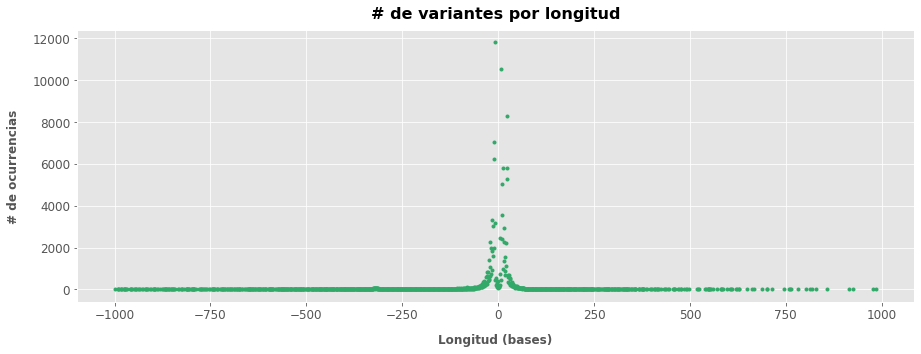

In [43]:
hf.SVs_length_count_plot(manta_37_bwa_df_mod, "illumina")

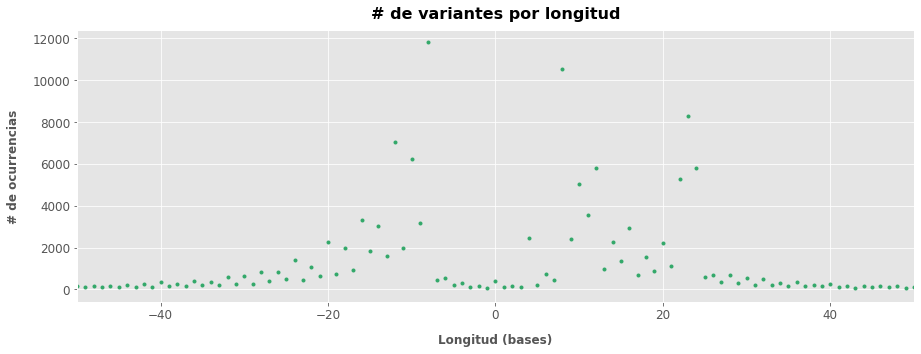

In [44]:
hf.SVs_length_count_plot(manta_37_bwa_df_mod, "illumina", True)

In [45]:
manta_sv_types = []
for pos in range(len(manta_37_bwa_df)):
    manta_sv_types.append(manta_37_bwa_df.iloc[pos].INFO.split("SVTYPE=")[1].split(";")[0])
manta_sv_types = sorted(manta_sv_types)
manta_sv_types = list(np.unique(manta_sv_types))
print(manta_sv_types)

['BND', 'DEL', 'DUP', 'INS']


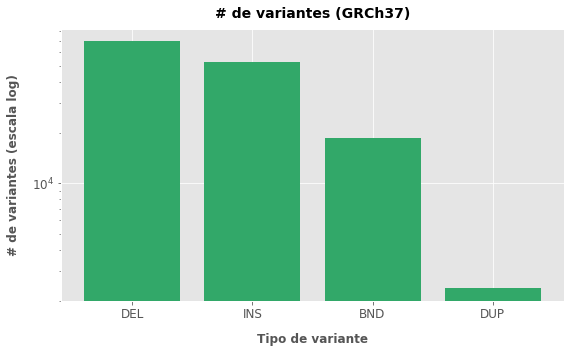

In [46]:
manta_variant_types_37 = hf.sv_counter(manta_37_bwa_df)
plt.figure(figsize = (9, 5))
hf.sv_number_barplot(manta_variant_types_37, 37, log = True)

## Distribución de variantes en función de su longitud (sin filtrar y filtrando sólo por FILTER)

In [47]:
i_variants_37_bwa_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                             i_variants_37_bwa_df)
i_variants_37_bwa_df_mod = hf.RM_illumina_df_parser(i_variants_37_bwa_df_mod)
i_variants_37_bwa_df_mod

CHROM  variant_begin  variant_end          REF    ALT  SV_length  \
0       chr1           4357         4361            G  GAGAA          4   
1       chr1           5952         5953            T     TG          1   
2       chr1           6765         6766            T     TG          1   
3       chr1           8016         8020        GATTT      G         -4   
4       chr1           8282         8292  CTCTTTCTCTT      C        -10   
...      ...            ...          ...          ...    ...        ...   
128973  chrY       59002610     59002611            A     AG          1   
128974  chrY       59009151     59009152            G     GA          1   
128975  chrY       59024400     59024402            G    GCA          2   
128976  chrY       59027141     59027142           TA      T         -1   
128977  chrY       59030585     59030587            T    TAA          2   

       SV_type  
0          INS  
1          INS  
2          INS  
3          DEL  
4          DEL  
...        ...  
128973     INS  
128974     INS  
128975     INS  
128976     DEL  
128977     INS  

[128978 rows x 7 columns]

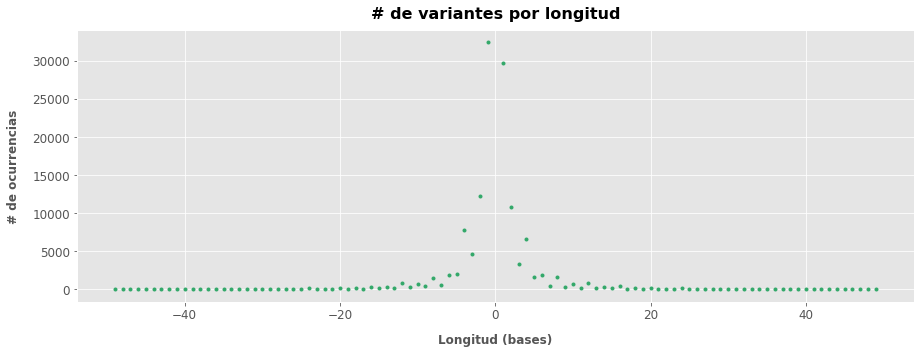

In [48]:
hf.SVs_length_count_plot(i_variants_37_bwa_df_mod, "illumina")

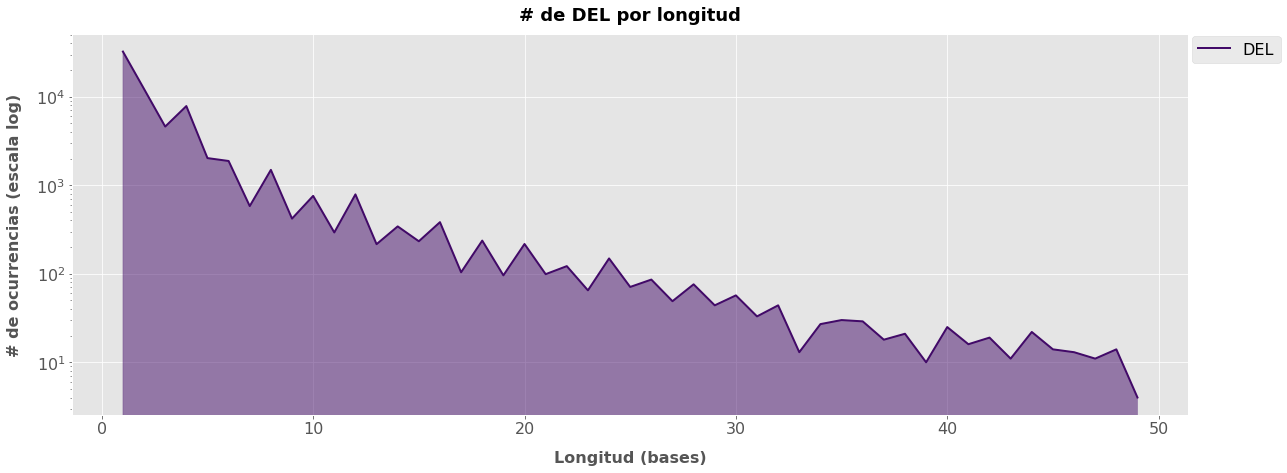

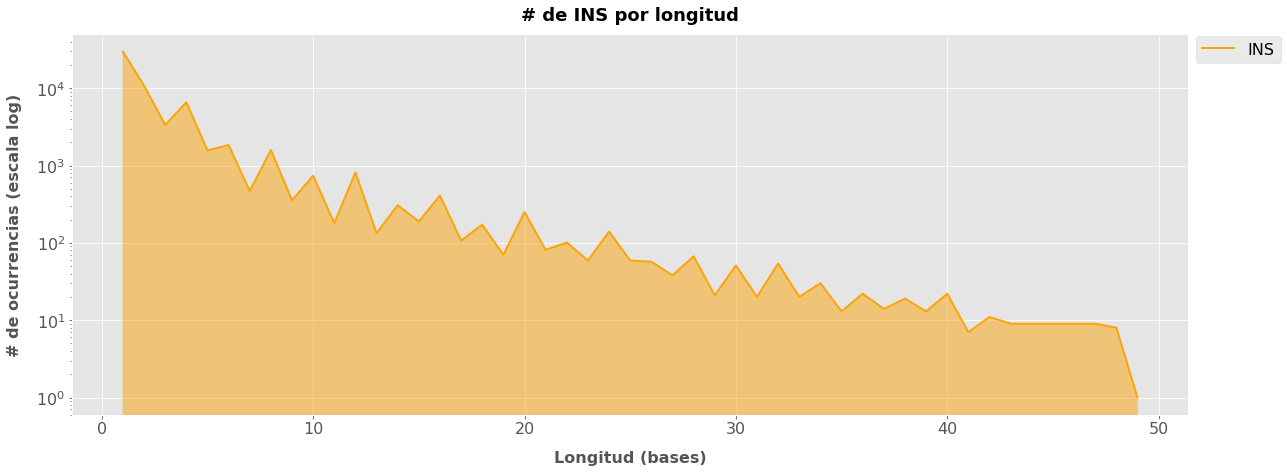

In [49]:
INS_DEL_bwa_37 = hf.INS_DEL_length_count_plot(i_variants_37_bwa_df_mod, "illumina")

In [50]:
i_variants_37_bwa_f_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                               i_variants_37_bwa_f_df)
i_variants_37_bwa_f_df_mod = hf.RM_illumina_df_parser(i_variants_37_bwa_f_df_mod)
i_variants_37_bwa_f_df_mod

CHROM  variant_begin  variant_end     REF  ALT  SV_length SV_type
0     chr1           6765         6766       T   TG          1     INS
1     chr1         127378       127381    CTCA    C         -3     DEL
2     chr1         127434       127437    CTCA    C         -3     DEL
3     chr1         129147       129148       A   AT          1     INS
4     chr1         130075       130079   CATTT    C         -4     DEL
...    ...            ...          ...     ...  ...        ...     ...
1409  chrY       28810857     28810862  ATAGAG    A         -5     DEL
1410  chrY       28812939     28812940       G   GT          1     INS
1411  chrY       58996106     58996107      AC    A         -1     DEL
1412  chrY       59024400     59024402       G  GCA          2     INS
1413  chrY       59030585     59030587       T  TAA          2     INS

[1414 rows x 7 columns]

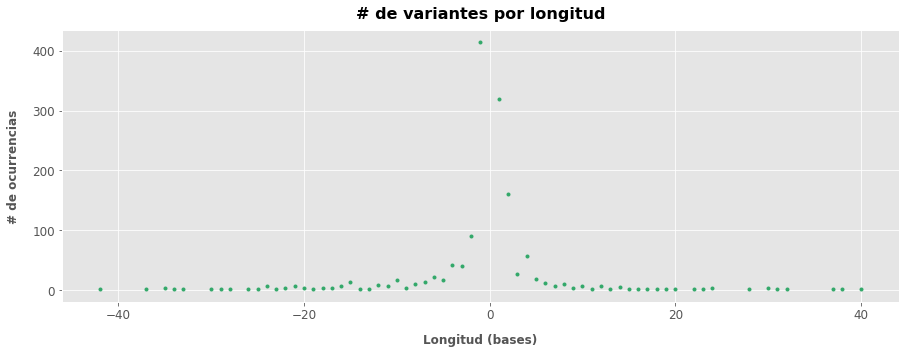

In [51]:
hf.SVs_length_count_plot(i_variants_37_bwa_f_df_mod, "illumina")

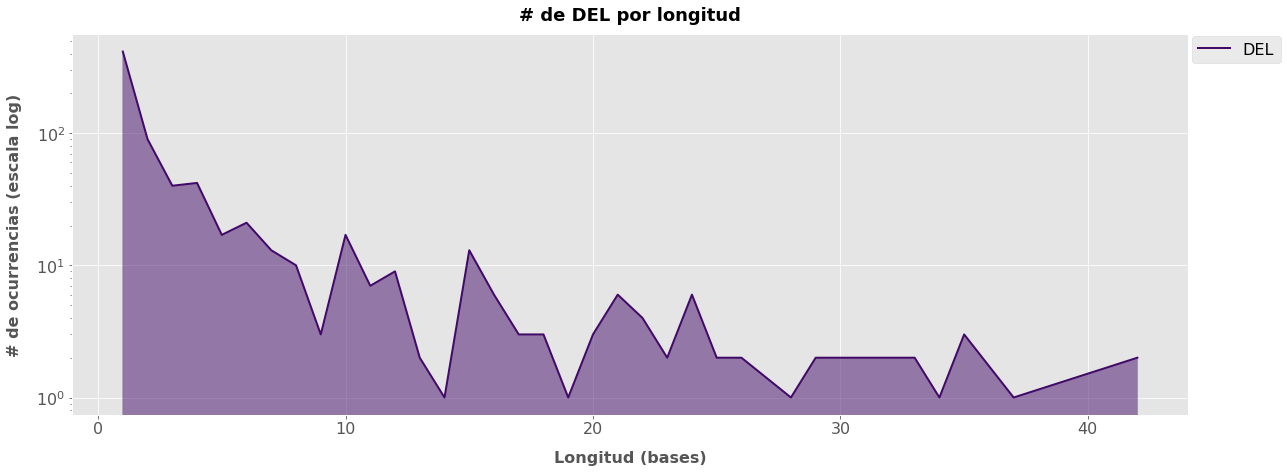

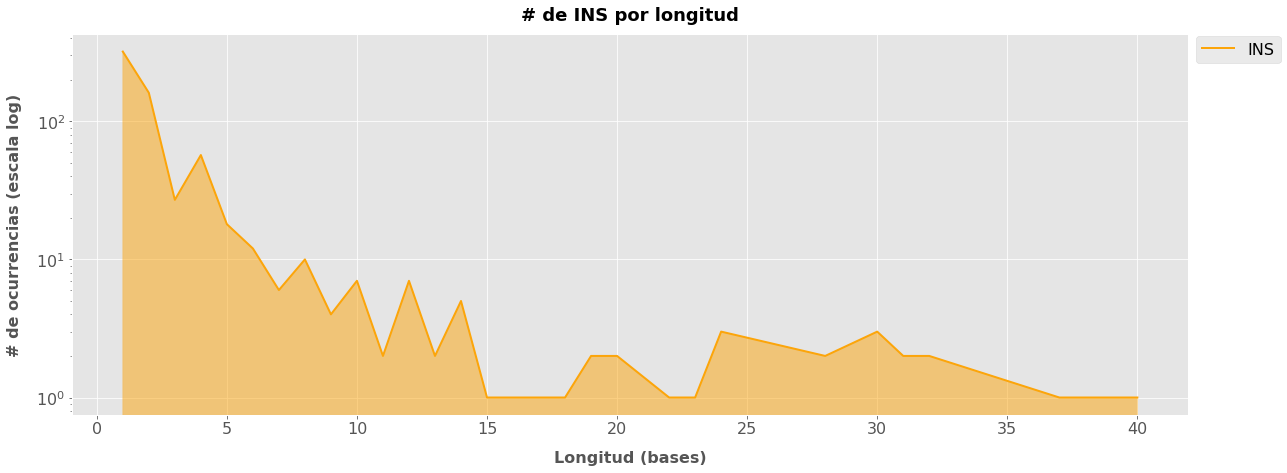

In [52]:
_ = hf.INS_DEL_length_count_plot(i_variants_37_bwa_f_df_mod, "illumina")

## RepeatMasker

In [3]:
hg19 = hf.RM_out_parser(f"{outdir}/genome/hg19.fa.out", rm_hap_alt = False)
hg19

query_sequence  query_begin  query_end repeat_class/family
ID                                                                
1                 chr1        10001      10468       Simple_repeat
2                 chr1        10469      11447      Satellite/telo
3                 chr1        11505      11675             LINE/L1
4                 chr1        11678      11780     DNA/hAT-Charlie
5                 chr1        15265      15355            SINE/MIR
...                ...          ...        ...                 ...
4277075           chrY     59360948   59361050     DNA/hAT-Charlie
4277076           chrY     59361053   59361244             LINE/L1
4277077           chrY     59361268   59362554      Satellite/telo
4277078           chrY     59362558   59363471       Simple_repeat
4277079           chrY     59363472   59363564       Simple_repeat

[5457869 rows x 4 columns]

In [4]:
i_variants_37_bwa = []
with gzip.open(f"{outdir}/illumina/sv_calling/strelka/GRCh37_bwa/results/variants/somatic.indels.vcf.gz",
               "rb") as file:
    for line in file:
        if "#" not in str(line.decode('utf-8')[1]):
            if "#" in line.decode('utf-8')[0]:
                i_variants_37_bwa.append(line.decode('utf-8')[1:].strip().split())
            else:
                i_variants_37_bwa.append(line.decode('utf-8').strip().split())
                
i_variants_37_bwa_df = pd.DataFrame(i_variants_37_bwa[1:], columns = i_variants_37_bwa[0])
i_variants_37_bwa_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                             i_variants_37_bwa_df,
                                             unlocalized = True,
                                             remove = True)
i_variants_37_bwa_df_mod = hf.RM_illumina_df_parser(i_variants_37_bwa_df_mod)

i_variants_37_bwa_df_mod

CHROM  variant_begin  variant_end          REF    ALT  SV_length  \
0       chr1           4357         4361            G  GAGAA          4   
1       chr1           5952         5953            T     TG          1   
2       chr1           6765         6766            T     TG          1   
3       chr1           8016         8020        GATTT      G         -4   
4       chr1           8282         8292  CTCTTTCTCTT      C        -10   
...      ...            ...          ...          ...    ...        ...   
128914  chrY       59002610     59002611            A     AG          1   
128915  chrY       59009151     59009152            G     GA          1   
128916  chrY       59024400     59024402            G    GCA          2   
128917  chrY       59027141     59027142           TA      T         -1   
128918  chrY       59030585     59030587            T    TAA          2   

       SV_type  
0          INS  
1          INS  
2          INS  
3          DEL  
4          DEL  
...        ...  
128914     INS  
128915     INS  
128916     INS  
128917     DEL  
128918     INS  

[128919 rows x 7 columns]

In [5]:
for sv_type in list(np.unique(i_variants_37_bwa_df_mod.SV_type.to_list())):
    print(sv_type + " stats:")
    print(i_variants_37_bwa_df_mod.iloc[list(i_variants_37_bwa_df_mod.SV_type == sv_type)].SV_length.describe())
    print()

DEL stats:
count    68321.000000
mean        -3.327952
std          4.740092
min        -49.000000
25%         -4.000000
50%         -2.000000
75%         -1.000000
max         -1.000000
Name: SV_length, dtype: float64

INS stats:
count    60598.000000
mean         3.287039
std          4.636033
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         49.000000
Name: SV_length, dtype: float64



In [6]:
if os.path.isfile(f"{outdir}/illumina/sv_calling/strelka/GRCh37_bwa/RM_bwa_37.pkl"):
    with open(f"{outdir}/illumina/sv_calling/strelka/GRCh37_bwa/RM_bwa_37.pkl", "rb") as file:
        dict_repeat_vars_bwa_37 = pickle.load(file)
        file.close()
else:
    with open(f"{outdir}/illumina/sv_calling/strelka/GRCh37_bwa/RM_bwa_37.pkl", "wb") as file:
        dict_repeat_vars_bwa_37 = hf.repeat_searcher(i_variants_37_bwa_df_mod, hg19)
        pickle.dump(dict_repeat_vars_bwa_37, file, -1)
        file.close()

In [7]:
dict_vars_bwa_37 = dict(sorted(i_variants_37_bwa_df_mod.CHROM.value_counts().to_dict().items(),
                        key = lambda item: item[0]))
chrs = ["chr" + str(num) for num in range(1,23)]
chrs.extend(["chrM", "chrX", "chrY"])
chrs = sorted(chrs)
for pos in range(len(chrs)):
    if chrs[pos] not in list(dict_repeat_vars_bwa_37.keys()):
        dict_repeat_vars_bwa_37[chrs[pos]] = []
    if chrs[pos] not in list(dict_vars_bwa_37.keys()):
        dict_vars_bwa_37[chrs[pos]] = []
dict_repeat_vars_bwa_37 = dict(sorted(dict_repeat_vars_bwa_37.items(), key = lambda item: item[0]))
dict_vars_bwa_37 = dict(sorted(dict_vars_bwa_37.items(), key = lambda item: item[0]))

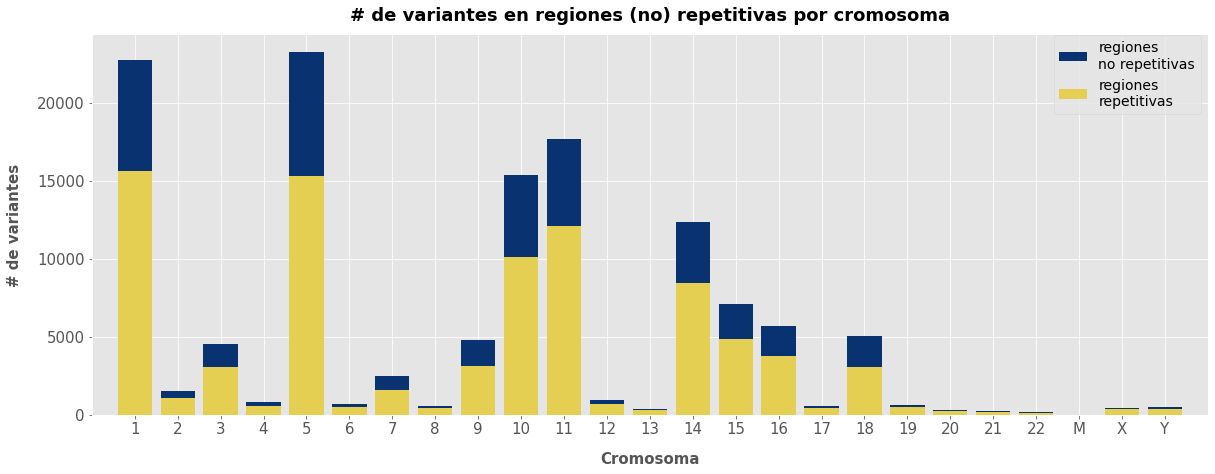

In [8]:
hf.variant_repeat_stacked_barplot(dict_vars_bwa_37, dict_repeat_vars_bwa_37, "illumina")

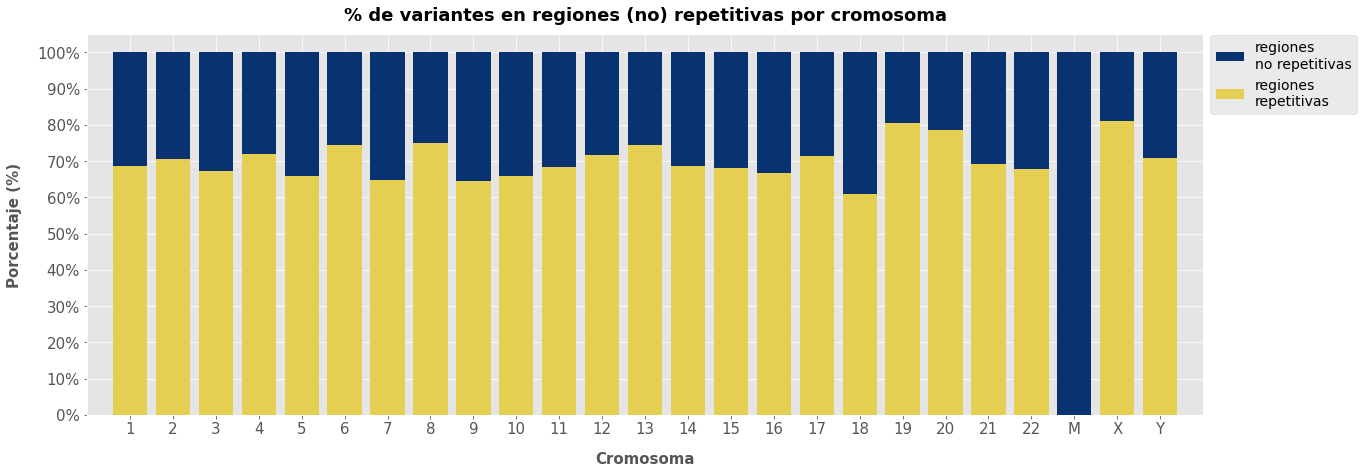

In [9]:
hf.variant_repeat_percentage_stacked_barplot(dict_vars_bwa_37, dict_repeat_vars_bwa_37, "illumina")

In [10]:
repeat_classes = []
for key_pos in range(len(dict_repeat_vars_bwa_37)):
    for value_pos in range(len(list(dict_repeat_vars_bwa_37.values())[key_pos])):
        repeat_classes.extend(list(dict_repeat_vars_bwa_37.values())[key_pos][value_pos][1])
repeat_classes_dict = {}
for pos in range(len(repeat_classes)):
    if repeat_classes[pos] not in list(repeat_classes_dict.keys()):
        repeat_classes_dict[repeat_classes[pos]] = 1
    else:
        repeat_classes_dict[repeat_classes[pos]] += 1
repeat_classes_dict = dict(sorted(repeat_classes_dict.items(), key = lambda item: item[0]))        
repeat_classes_dict

{'DNA': 32,
 'DNA/Kolobok': 2,
 'DNA/MULE-MuDR': 40,
 'DNA/PiggyBac': 24,
 'DNA/TcMar': 7,
 'DNA/TcMar-Mariner': 108,
 'DNA/TcMar-Tc1': 7,
 'DNA/TcMar-Tc2': 82,
 'DNA/TcMar-Tigger': 1378,
 'DNA/hAT': 52,
 'DNA/hAT-Ac': 21,
 'DNA/hAT-Blackjack': 129,
 'DNA/hAT-Charlie': 1653,
 'DNA/hAT-Tag1': 30,
 'DNA/hAT-Tip100': 342,
 'DNA/hAT-Tip100?': 11,
 'DNA/hAT?': 6,
 'DNA?': 6,
 'DNA?/PiggyBac?': 2,
 'DNA?/hAT-Tip100?': 4,
 'LINE/CR1': 291,
 'LINE/Dong-R4': 2,
 'LINE/L1': 20867,
 'LINE/L1-Tx1': 2,
 'LINE/L2': 2743,
 'LINE/Penelope': 5,
 'LINE/RTE-BovB': 24,
 'LINE/RTE-X': 93,
 'LTR': 51,
 'LTR/ERV1': 2402,
 'LTR/ERV1?': 15,
 'LTR/ERVK': 197,
 'LTR/ERVL': 1612,
 'LTR/ERVL-MaLR': 2525,
 'LTR/ERVL?': 22,
 'LTR/Gypsy': 89,
 'LTR/Gypsy?': 24,
 'LTR?': 41,
 'Low_complexity': 1980,
 'RC/Helitron': 10,
 'RC?/Helitron?': 2,
 'RNA': 3,
 'Retroposon/SVA': 323,
 'SINE/5S-Deu-L2': 5,
 'SINE/Alu': 23186,
 'SINE/MIR': 1899,
 'SINE/tRNA': 3,
 'SINE/tRNA-Deu': 1,
 'SINE/tRNA-RTE': 10,
 'Satellite': 85,
 'Satel

In [11]:
i_variants_37_bwa_f_df = i_variants_37_bwa_df.iloc[list((i_variants_37_bwa_df.FILTER == "PASS") |
                                                        (i_variants_37_bwa_df.FILTER.str.contains("HighDepth")))]
i_variants_37_bwa_f_df = i_variants_37_bwa_f_df.iloc[list(i_variants_37_bwa_f_df.FILTER.str.contains("LowDepth") == False)]
i_variants_37_bwa_f_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                               i_variants_37_bwa_f_df,
                                               unlocalized = True,
                                               remove = True)
i_variants_37_bwa_f_df_mod = hf.RM_illumina_df_parser(i_variants_37_bwa_f_df_mod)
i_variants_37_bwa_f_df_mod

CHROM  variant_begin  variant_end     REF  ALT  SV_length SV_type
0     chr1           6765         6766       T   TG          1     INS
1     chr1         127378       127381    CTCA    C         -3     DEL
2     chr1         127434       127437    CTCA    C         -3     DEL
3     chr1         129147       129148       A   AT          1     INS
4     chr1         130075       130079   CATTT    C         -4     DEL
...    ...            ...          ...     ...  ...        ...     ...
1406  chrY       28810857     28810862  ATAGAG    A         -5     DEL
1407  chrY       28812939     28812940       G   GT          1     INS
1408  chrY       58996106     58996107      AC    A         -1     DEL
1409  chrY       59024400     59024402       G  GCA          2     INS
1410  chrY       59030585     59030587       T  TAA          2     INS

[1411 rows x 7 columns]

In [12]:
for sv_type in list(np.unique(i_variants_37_bwa_f_df_mod.SV_type.to_list())):
    print(sv_type + " stats:")
    print(i_variants_37_bwa_f_df_mod.iloc[list(i_variants_37_bwa_f_df_mod.SV_type == sv_type)].SV_length.describe())
    print()

DEL stats:
count    748.000000
mean      -4.187166
std        6.491040
min      -42.000000
25%       -4.000000
50%       -1.000000
75%       -1.000000
max       -1.000000
Name: SV_length, dtype: float64

INS stats:
count    663.000000
mean       3.304676
std        5.256913
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: SV_length, dtype: float64



In [13]:
if os.path.isfile(f"{outdir}/illumina/sv_calling/strelka/GRCh37_bwa/RM_bwa_37_f.pkl"):
    with open(f"{outdir}/illumina/sv_calling/strelka/GRCh37_bwa/RM_bwa_37_f.pkl", "rb") as file:
        dict_repeat_vars_bwa_37_f = pickle.load(file)
        file.close()
else:
    with open(f"{outdir}/illumina/sv_calling/strelka/GRCh37_bwa/RM_bwa_37_f.pkl", "wb") as file:
        dict_repeat_vars_bwa_37_f = hf.repeat_searcher(i_variants_37_bwa_f_df_mod, hg19)
        pickle.dump(dict_repeat_vars_bwa_37_f, file, -1)
        file.close()

In [14]:
dict_vars_bwa_37_f = dict(sorted(i_variants_37_bwa_f_df_mod.CHROM.value_counts().to_dict().items(),
                                 key = lambda item: item[0]))
chrs = ["chr" + str(num) for num in range(1,23)]
chrs.extend(["chrM", "chrX", "chrY"])
chrs = sorted(chrs)
for pos in range(len(chrs)):
    if chrs[pos] not in list(dict_repeat_vars_bwa_37_f.keys()):
        dict_repeat_vars_bwa_37_f[chrs[pos]] = []
    if chrs[pos] not in list(dict_vars_bwa_37_f.keys()):
        dict_vars_bwa_37_f[chrs[pos]] = []
dict_repeat_vars_bwa_37_f = dict(sorted(dict_repeat_vars_bwa_37_f.items(), key = lambda item: item[0]))
dict_vars_bwa_37_f = dict(sorted(dict_vars_bwa_37_f.items(), key = lambda item: item[0]))

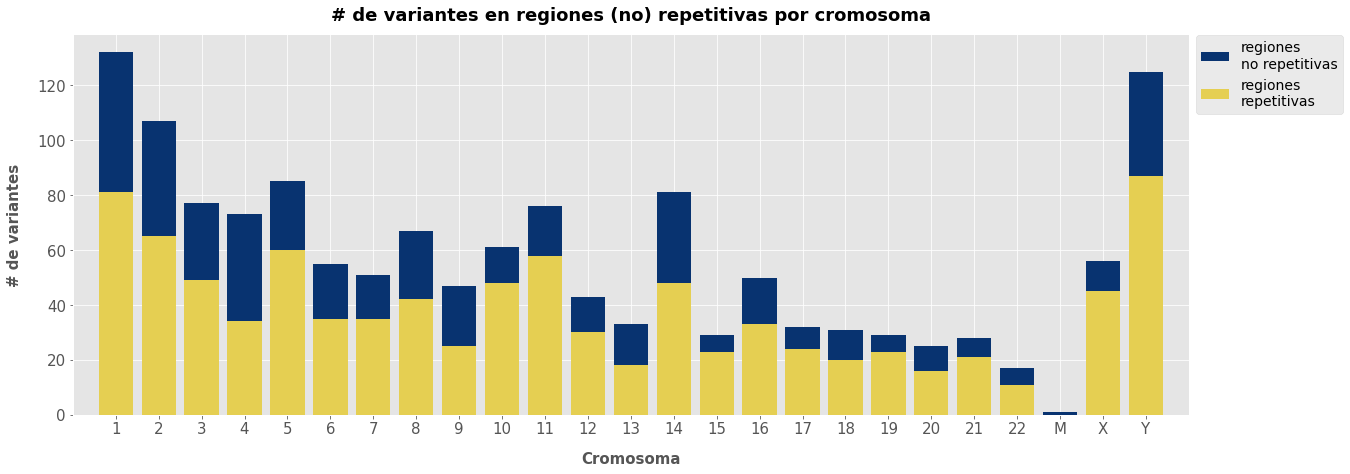

In [15]:
hf.variant_repeat_stacked_barplot(dict_vars_bwa_37_f, dict_repeat_vars_bwa_37_f, "illumina")

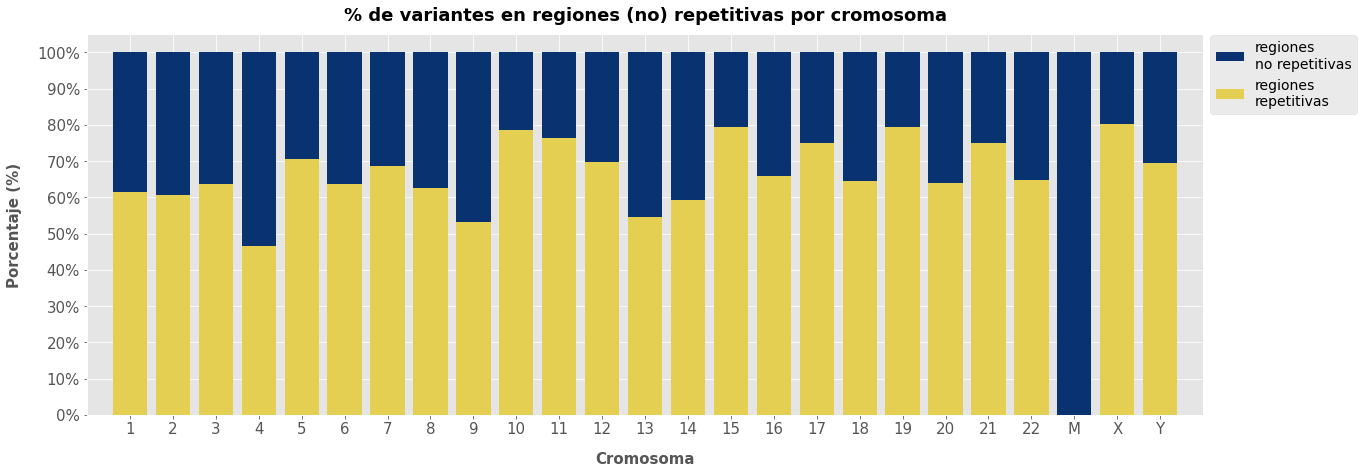

In [16]:
hf.variant_repeat_percentage_stacked_barplot(dict_vars_bwa_37_f, dict_repeat_vars_bwa_37_f, "illumina")

In [19]:
variants_total = np.array(list(dict_vars_bwa_37_f.values()))
variants_repeated = np.array([len(chromosome) for chromosome in list(dict_repeat_vars_bwa_37_f.values())])
dataframe = pd.DataFrame(np.round(variants_repeated / variants_total * 100, 2),
                         index = list(dict_vars_bwa_37_f.keys()))
dataframe

0
chr1   61.36
chr10  78.69
chr11  76.32
chr12  69.77
chr13  54.55
chr14  59.26
chr15  79.31
chr16  66.00
chr17  75.00
chr18  64.52
chr19  79.31
chr2   60.75
chr20  64.00
chr21  75.00
chr22  64.71
chr3   63.64
chr4   46.58
chr5   70.59
chr6   63.64
chr7   68.63
chr8   62.69
chr9   53.19
chrM    0.00
chrX   80.36
chrY   69.60

In [68]:
repeat_classes_f = []
for key_pos in range(len(dict_repeat_vars_bwa_37_f)):
    for value_pos in range(len(list(dict_repeat_vars_bwa_37_f.values())[key_pos])):
        repeat_classes_f.extend(list(dict_repeat_vars_bwa_37_f.values())[key_pos][value_pos][1])
repeat_classes_f_dict = {}
for pos in range(len(repeat_classes_f)):
    if repeat_classes_f[pos] not in list(repeat_classes_f_dict.keys()):
        repeat_classes_f_dict[repeat_classes_f[pos]] = 1
    else:
        repeat_classes_f_dict[repeat_classes_f[pos]] += 1
repeat_classes_f_dict = dict(sorted(repeat_classes_f_dict.items(), key = lambda item: item[0]))
repeat_classes_f_dict

{'DNA/TcMar-Mariner': 2,
 'DNA/TcMar-Tc2': 2,
 'DNA/TcMar-Tigger': 20,
 'DNA/hAT': 2,
 'DNA/hAT-Blackjack': 2,
 'DNA/hAT-Charlie': 11,
 'DNA/hAT-Tip100': 1,
 'LINE/CR1': 1,
 'LINE/L1': 227,
 'LINE/L2': 23,
 'LINE/Penelope': 2,
 'LINE/RTE-X': 1,
 'LTR/ERV1': 35,
 'LTR/ERV1?': 1,
 'LTR/ERVK': 1,
 'LTR/ERVL': 26,
 'LTR/ERVL-MaLR': 24,
 'LTR/Gypsy?': 1,
 'Low_complexity': 19,
 'Retroposon/SVA': 5,
 'SINE/Alu': 154,
 'SINE/MIR': 21,
 'Satellite': 5,
 'Satellite/centr': 17,
 'Satellite/telo': 3,
 'Simple_repeat': 385,
 'rRNA': 1}

In [69]:
hg19 = hf.RM_out_parser(f"{outdir}/genome/hg19.fa.out", rm_hap_alt = True)
hg19

query_sequence  query_begin  query_end repeat_class/family
ID                                                                
1                 chr1        10001      10468       Simple_repeat
2                 chr1        10469      11447      Satellite/telo
3                 chr1        11505      11675             LINE/L1
4                 chr1        11678      11780     DNA/hAT-Charlie
5                 chr1        15265      15355            SINE/MIR
...                ...          ...        ...                 ...
4277075           chrY     59360948   59361050     DNA/hAT-Charlie
4277076           chrY     59361053   59361244             LINE/L1
4277077           chrY     59361268   59362554      Satellite/telo
4277078           chrY     59362558   59363471       Simple_repeat
4277079           chrY     59363472   59363564       Simple_repeat

[5399438 rows x 4 columns]

In [70]:
def repeatedchr_percentage_stacked_barplot(repeat_df, genome_file, tech, percentage = False):

    ### Creation of a dict with each chr (key) and its number of bases in repeated regions (value)
    repeat_lengths = {}
    for chrom in list(np.unique(repeat_df.query_sequence.to_list())):
        repeat_lengths[chrom] = sum(list(repeat_df.iloc[list(repeat_df.query_sequence == chrom)].query_end -
                                         repeat_df.iloc[list(repeat_df.query_sequence == chrom)].query_begin))

    ### Creation of a dict with each chr (key) and its total number of bases (value)
    chrs_lengths = {}
    with open(genome_file, "r") as f:
        for line in f:
            if ">" in line:
                if ("unplaced" in line) or ("unlocalized" in line):
                    status = -1
                else:
                    status = 0
                    if "mitochondrion" in line:
                        name = "chrM"
                    else:
                        name = "chr" + line.split()[4].split(",")[0]
                    if name not in list(chrs_lengths.keys()):
                        chrs_lengths[name] = 0
                    else:
                        continue
            else:
                if status == -1:
                    continue
                elif status == 0:
                    chrs_lengths[name] += len(line.strip())
    chrs_lengths = dict(sorted(chrs_lengths.items(), key = lambda item: item[0]))

    ### Stacked bar plot of the % of chr in (non-)repeated regions
    sv_colors = plt.get_cmap('cividis')(np.linspace(0.1, 0.9, 2))
    fig = plt.figure(figsize = (20, 7))
    for pos in range(len(chrs_lengths)):
        if list(chrs_lengths.keys())[pos].split("chr")[1] in ["M", "X", "Y"]:
            if percentage:
                barplot_total = plt.bar(x = [pos + 1],
                                        height = (list(chrs_lengths.values())[pos] - list(repeat_lengths.values())[pos]) /
                                                     list(chrs_lengths.values())[pos] * 100,
                                        color = sv_colors[0],
                                        bottom = list(repeat_lengths.values())[pos] /
                                                     list(chrs_lengths.values())[pos] * 100,
                                        label = "regiones\nno repetitivas")
                barplot_repeatm = plt.bar(x = [pos + 1],
                                          height = list(repeat_lengths.values())[pos] /
                                                       list(chrs_lengths.values())[pos] * 100,
                                          color = sv_colors[1],
                                          label = "regiones\nrepetitivas")
            else:
                barplot_total = plt.bar(x = [pos + 1],
                                        height = list(chrs_lengths.values())[pos] - list(repeat_lengths.values())[pos],
                                        color = sv_colors[0],
                                        bottom = list(repeat_lengths.values())[pos],
                                        label = "regiones\nno repetitivas")
                barplot_repeatm = plt.bar(x = [pos + 1],
                                          height = list(repeat_lengths.values())[pos],
                                          color = sv_colors[1],
                                          label = "regiones\nrepetitivas")
        else:
            if percentage:
                barplot_total = plt.bar(x = [int(list(chrs_lengths.keys())[pos].split("chr")[1])],
                                        height = (list(chrs_lengths.values())[pos] - list(repeat_lengths.values())[pos]) /
                                                     list(chrs_lengths.values())[pos] * 100,
                                        bottom = list(repeat_lengths.values())[pos] /
                                                     list(chrs_lengths.values())[pos] * 100,
                                        color = sv_colors[0],
                                        label = "regiones\nno repetitivas")
                barplot_repeatm = plt.bar(x = [int(list(chrs_lengths.keys())[pos].split("chr")[1])],
                                          height = list(repeat_lengths.values())[pos] /
                                                       list(chrs_lengths.values())[pos] * 100,
                                          color = sv_colors[1],
                                          label = "regiones\nrepetitivas")
            else:
                barplot_total = plt.bar(x = [int(list(chrs_lengths.keys())[pos].split("chr")[1])],
                                        height = list(chrs_lengths.values())[pos] - list(repeat_lengths.values())[pos],
                                        bottom = list(repeat_lengths.values())[pos],
                                        color = sv_colors[0],
                                        label = "regiones\nno repetitivas")
                barplot_repeatm = plt.bar(x = [int(list(chrs_lengths.keys())[pos].split("chr")[1])],
                                          height = list(repeat_lengths.values())[pos],
                                          color = sv_colors[1],
                                          label = "regiones\nrepetitivas")
    labels = [str(num) for num in range(1, 23)]
    labels.extend(["M", "X", "Y"])
    plt.xlim(0, len(chrs_lengths) + 1)
    plt.xticks(range(1, len(chrs_lengths) + 1), labels = labels, fontsize = 15)
    plt.xlabel("Cromosoma", fontweight = "bold", fontsize = 15, labelpad = 15)
    if percentage:
        plt.ylabel("Porcentaje (%)", fontweight = "bold", fontsize = 15, labelpad = 15)
        plt.yticks(range(0, 110, 10), [str(num) + "%" for num in range(0, 110, 10)], fontsize = 15)
        plt.title("% de regiones (no) repetitivas por cromosoma", fontweight = "bold", y = 1.02, fontsize = 18)
        plt.legend(handles = [barplot_total, barplot_repeatm], fontsize = 14, bbox_to_anchor = (1.0025, 1.016))
    else:
        plt.ylabel("Longitud (bases)", fontweight = "bold", fontsize = 15, labelpad = 15)
        plt.yticks(fontsize = 15)
        plt.title("Longitud de regiones (no) repetitivas por cromosoma", fontweight = "bold", y = 1.02, fontsize = 18)
        plt.legend(handles = [barplot_total, barplot_repeatm], fontsize = 14, bbox_to_anchor = (1.145, 1.016))

    return chrs_lengths, repeat_lengths, fig

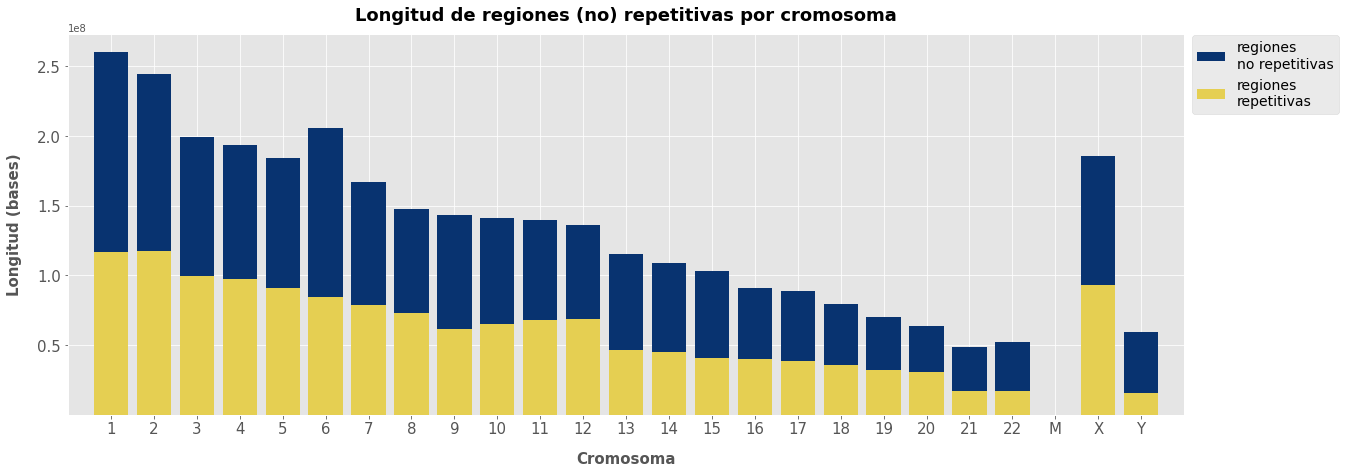

In [71]:
hg19_repeated = repeatedchr_percentage_stacked_barplot(hg19,
                                                          f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                                          "illumina")

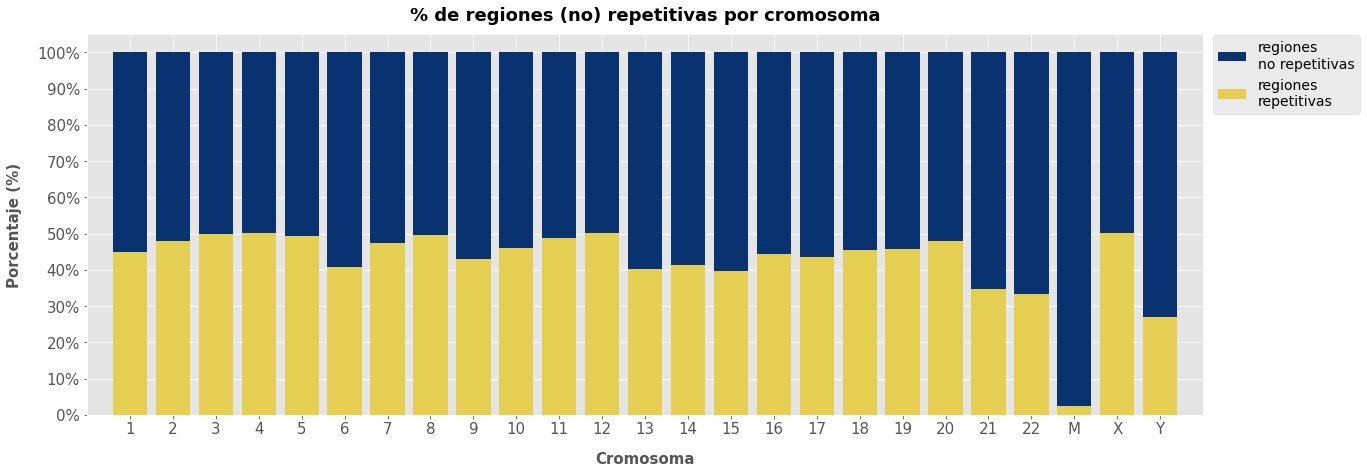

In [72]:
hg19_repeated_percentage = hf.repeatedchr_percentage_stacked_barplot(hg19,
                                                                     f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                                                     "illumina",
                                                                     percentage = True)